## Data Preprocessing




#### Using rigid Eucledian distance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-contrib-python

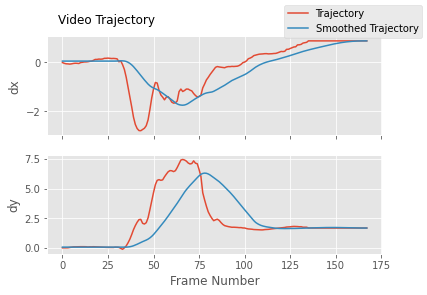

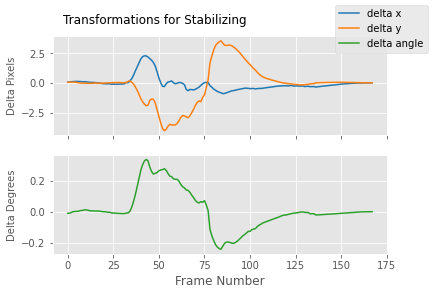

In [ ]:
from vidstab import VidStab
import matplotlib.pyplot as plt

stabilizer = VidStab()
stabilizer.stabilize(input_path='/content/drive/MyDrive/ISL Openpose/Videos/tea.mp4', output_path='/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea.avi')

stabilizer.plot_trajectory()
plt.show()

stabilizer.plot_transforms()
plt.show()

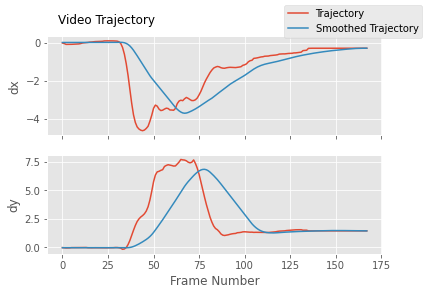

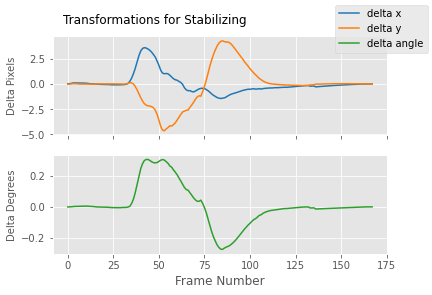

In [ ]:
stabilizer1 = VidStab()


# # Using a specific keypoint detector
# stabilizer = VidStab(kp_method='ORB')
# stabilizer.stabilize(input_path='input_video.mp4', output_path='stable_video.avi')

# Using a specific keypoint detector and customizing keypoint parameters
stabilizer1 = VidStab(kp_method='FAST', threshold=42, nonmaxSuppression=False)
stabilizer1.stabilize(input_path='/content/drive/MyDrive/ISL Openpose/Videos/tea.mp4', output_path='/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea-FAST.avi')

stabilizer1.plot_trajectory()
plt.show()

stabilizer1.plot_transforms()
plt.show()

In [ ]:
!ffmpeg -y -loglevel info -i '/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea-FAST.avi' '/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea-FAST.mp4'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea.mp4', width=960, height=720)
# show_local_mp4_video('/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea.avi', width=960, height=720)

In [ ]:
show_local_mp4_video('/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea-FAST.mp4', width=960, height=720)

### Background subtraction


In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea.avi')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/MyDrive/ISL Openpose/BG/tea.mp4',fourcc, 20.0, (640,480))

while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    # fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    out.write(fgmask)
    # cv2.imshow('frame',fgmask)
    # k = cv2.waitKey(30) & 0xff
    # if k == 27:
    #     break

cap.release()
out.release()
cv2.destroyAllWindows()

KeyboardInterrupt: ignored

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show(name, img):
  print("Name")
  imgplot = plt.imshow(img)
  plt.show()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import cv2 
#reading the image  
cap = cv2.VideoCapture('/content/drive/MyDrive/ISL Openpose/Stabilized/stable_tea.avi')
while(1):
    ret, frame = cap.read()
    edged = cv2.Canny(frame, 100, 250) 
    show("Edges", edged) 
    
    #applying closing function  
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)) 
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
    show("Closed", closed) 
    
    #finding_contours  
    (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    
    for c in cnts: 
      peri = cv2.arcLength(c, True) 
      approx = cv2.approxPolyDP(c, 0.02 * peri, True) 
      cv2.drawContours(frame, [approx], -1, (0, 255, 0), 2) 
    show("Output", frame) 


# POST- PROCESS


In [ ]:
import json 
import os
from itertools import islice
from math import ceil
import numpy as np
poses=[]
faces=[]
Hands_left=[]
Hands_right=[]
frames=[]
count=0
def create(l): 
  temp=[]  
  for j in range(0,len(l),3):
    # print(l[j],l[j+1],l[j+2])
    if (l[j+2]>0.1):
      temp.append(ceil(l[j]))
      temp.append(ceil(l[j+1]))
    else:
      temp.append(np.nan)
      temp.append(np.nan)  
  return temp
for files in os.listdir("/content/drive/MyDrive/ISL Openpose/Output/Tea/json"):
  f = open("/content/drive/MyDrive/ISL Openpose/Output/Tea/json/"+files)
  count=count+1
  frames.append(count)
  # data = json.load(f) 
  data = json.load(f)
  print(files) 
  # returns JSON object as  
  # a dictionary 
  for i in data["people"]:
    Poses_temp=create(i['pose_keypoints_2d'])
    faces_temp=create(i['face_keypoints_2d'])
    Hands_left_temp=create(i['hand_left_keypoints_2d'])
    Hands_right_temp=create(i["hand_right_keypoints_2d"])
  # data = json.load(f) 
  for i in data["people"]:
    # Poses_temp=list(i['pose_keypoints_2d']) 
    print("Pose " + str(len(Poses_temp))+ str(Poses_temp))
    poses.append(Poses_temp)
    print("Face " + str(len(faces_temp)) + str(faces_temp))
    faces.append(faces_temp)
    print("Hand-left " + str(len(Hands_left_temp))+ str(Hands_left_temp))
    Hands_left.append(Hands_left_temp)
    print("Hand-right "+ str(len(Hands_right_temp))+ str(Hands_right_temp))
    Hands_right.append(Hands_right_temp)
f.close()
# Hands_right_temp= Hands_right.copy()
# Hands_left_temp = Hands_left.copy()
# poses_temp= poses.copy()

tea_000000000022_keypoints.json
Pose 50[401, 98, 400, 182, 331, 183, 310, 292, 314, 358, 471, 178, 491, 279, 491, 358, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 387, 84, 417, 85, 368, 98, 434, 99, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Face 140[369, 90, 369, 98, 369, 106, 371, 114, 373, 122, 377, 129, 383, 134, 391, 137, 399, 137, 408, 137, 416, 134, 422, 129, 426, 123, 428, 115, 430, 108, 431, 100, 431, 91, 374, 80, 379, 77, 385, 76, 390, 77, 395, 78, 405, 79, 411, 78, 416, 77, 422, 78, 426, 80, 400, 85, 400, 89, 400, 94, 400, 98, 394, 103, 397, 105, 400, 106, 403, 105, 407, 104, 380, 86, 384, 84, 388, 85, 391, 87, 388, 88, 384, 88, 408, 87, 413, 86, 417, 86, 420, 88, 417, 89, 413, 88, 388, 116, 392, 112, 397, 111, 400, 112, 403, 111, 408, 112, 411, 116, 408, 119, 403, 120, 400, 120, 396, 120, 391, 119, 391, 116, 397, 115, 400, 115, 403, 115, 409, 115, 403, 115, 400, 115, 397, 115, 386, 86, 414, 86]
Hand-left 42[nan, nan, nan, nan, nan,

In [ ]:
print(data)

{'version': 1.3, 'people': [{'person_id': [-1], 'pose_keypoints_2d': [400.579, 97.3822, 0.867341, 399.592, 181.451, 0.682184, 330.146, 182.436, 0.605303, 309.604, 291.029, 0.662641, 313.518, 357.569, 0.159849, 470.025, 177.55, 0.625717, 490.593, 278.297, 0.713501, 490.606, 357.564, 0.206429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 386.842, 83.6847, 0.851046, 416.215, 84.6282, 0.816544, 367.332, 97.3269, 0.820889, 433.797, 98.2841, 0.886576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'face_keypoints_2d': [368.288, 89.8493, 0.816976, 368.641, 97.6063, 0.839648, 368.993, 105.716, 0.840171, 370.756, 113.825, 0.895845, 372.519, 121.582, 0.778319, 376.398, 128.281, 0.885531, 382.392, 133.57, 0.821818, 390.501, 136.391, 0.861167, 398.963, 136.743, 0.854329, 407.425, 136.391, 0.852154, 415.182, 133.57, 0.803826, 421.529, 128.634, 0.835804, 425.76, 122.287, 0.856186, 427.875, 114.53, 0.855658, 429.638, 107.479, 0.849763, 430.344, 99.3692, 0.911644, 430.344, 90

In [ ]:
pose_temp=[]
for i in data["people"]:
  print(len(i['face_keypoints_2d']))
  for j in range(0,len(i['face_keypoints_2d']),3):
    # print(i['face_keypoints_2d'][j],i['face_keypoints_2d'][j+1],i['face_keypoints_2d'][j+2])
    if (i['face_keypoints_2d'][j+2]>0.1):
      pose_temp.append(i['face_keypoints_2d'][j])
      pose_temp.append(i['face_keypoints_2d'][j+1])
    else:
      pose_temp.append(np.nan)
      pose_temp.append(np.nan)
print(len(pose_temp))

210
140


In [ ]:
POSE=[]
FACE=[]
LHAND=[]
RHAND=[]
HEAD=["FRAME"]
for i in range(25):
  POSE.append("pX"+str(i))
  POSE.append("pY"+str(i))
for j in range(70):
  FACE.append("fX"+str(j))
  FACE.append("fY"+str(j))
for r in range(21):
  RHAND.append("rX"+str(r))
  RHAND.append("rY"+str(r))
for l in range(21):
  LHAND.append("lX"+str(l))
  LHAND.append("lY"+str(l))


In [ ]:
print(POSE)
print(FACE)
print(LHAND)
print(RHAND)
for i in POSE:
  HEAD.append(i)
for j in FACE:
  HEAD.append(j)
for r in RHAND:
  HEAD.append(r)
for l in LHAND:
  HEAD.append(l)

['pX0', 'pY0', 'pX1', 'pY1', 'pX2', 'pY2', 'pX3', 'pY3', 'pX4', 'pY4', 'pX5', 'pY5', 'pX6', 'pY6', 'pX7', 'pY7', 'pX8', 'pY8', 'pX9', 'pY9', 'pX10', 'pY10', 'pX11', 'pY11', 'pX12', 'pY12', 'pX13', 'pY13', 'pX14', 'pY14', 'pX15', 'pY15', 'pX16', 'pY16', 'pX17', 'pY17', 'pX18', 'pY18', 'pX19', 'pY19', 'pX20', 'pY20', 'pX21', 'pY21', 'pX22', 'pY22', 'pX23', 'pY23', 'pX24', 'pY24']
['fX0', 'fY0', 'fX1', 'fY1', 'fX2', 'fY2', 'fX3', 'fY3', 'fX4', 'fY4', 'fX5', 'fY5', 'fX6', 'fY6', 'fX7', 'fY7', 'fX8', 'fY8', 'fX9', 'fY9', 'fX10', 'fY10', 'fX11', 'fY11', 'fX12', 'fY12', 'fX13', 'fY13', 'fX14', 'fY14', 'fX15', 'fY15', 'fX16', 'fY16', 'fX17', 'fY17', 'fX18', 'fY18', 'fX19', 'fY19', 'fX20', 'fY20', 'fX21', 'fY21', 'fX22', 'fY22', 'fX23', 'fY23', 'fX24', 'fY24', 'fX25', 'fY25', 'fX26', 'fY26', 'fX27', 'fY27', 'fX28', 'fY28', 'fX29', 'fY29', 'fX30', 'fY30', 'fX31', 'fY31', 'fX32', 'fY32', 'fX33', 'fY33', 'fX34', 'fY34', 'fX35', 'fY35', 'fX36', 'fY36', 'fX37', 'fY37', 'fX38', 'fY38', 'fX39', 'fY39'

In [ ]:
print(len(HEAD), 50+140+42+42+1)

275 275


In [ ]:
import pandas as pd
df_poses=pd.DataFrame(poses,columns=POSE)
print(df_poses)

     pX0  pY0  pX1  pY1  pX2  pY2  ...  pX22  pY22  pX23  pY23  pX24  pY24
0    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
1    401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
2    401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
3    401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
4    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
133  401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
134  401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
135  401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
136  401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
137  401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN

[138 rows x 50 columns]


In [ ]:
df_face=pd.DataFrame(faces, columns=FACE)
print(df_face)

     fX0  fY0  fX1  fY1  fX2  fY2  ...  fX67  fY67  fX68  fY68  fX69  fY69
0    369   90  369   98  369  106  ...   397   115   386    86   414    86
1    369   91  369   98  370  106  ...   396   115   386    86   414    87
2    369   91  369   98  370  106  ...   396   115   386    86   414    87
3    369   91  369   98  370  106  ...   396   115   386    86   414    86
4    369   90  369   98  369  106  ...   397   115   386    86   414    86
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
133  369   91  369   98  370  106  ...   396   115   386    86   414    86
134  369   91  369   98  370  106  ...   397   115   386    86   414    87
135  369   91  369   98  370  106  ...   397   115   386    86   414    87
136  369   91  369   98  370  106  ...   397   115   386    86   414    87
137  369   90  369   98  370  106  ...   397   115   386    86   414    87

[138 rows x 140 columns]


In [ ]:
df_lhand=pd.DataFrame(Hands_left, columns=LHAND)
df_rhand=pd.DataFrame(Hands_right,columns=RHAND)

In [ ]:
df_lhand

lX0  lY0  lX1  lY1  lX2  lY2  ...  lX18  lY18  lX19  lY19  lX20  lY20
0    NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1    NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
2    NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3    NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4    NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
133  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
134  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
135  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
136  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
137  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN

[138 rows x 42 columns]

In [ ]:
df_rhand

rX0    rY0  rX1  rY1  rX2  rY2  ...  rX18  rY18  rX19  rY19  rX20  rY20
0      NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1      NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
2    313.0  356.0  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3      NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
..     ...    ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
133    NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
134    NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
135    NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
136    NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
137    NaN    NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN

[138 rows x 42 columns]

In [ ]:
df_frames = pd.DataFrame(np.column_stack([frames]), columns=["frame"])
df_frames

frame
0        1
1        2
2        3
3        4
4        5
..     ...
133    134
134    135
135    136
136    137
137    138

[138 rows x 1 columns]

In [ ]:
df_joints = pd.concat([df_frames,df_poses, df_face,df_rhand,df_lhand], axis=1)

In [ ]:
df_joints=df_joints.drop_duplicates()

In [ ]:
df_joints

frame  pX0  pY0  pX1  pY1  pX2  ...  lX18  lY18  lX19  lY19  lX20  lY20
0        1  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
1        2  401   98  399  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
2        3  401   98  399  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
3        4  401   98  399  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
4        5  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
..     ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
133    134  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
134    135  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
135    136  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
136    137  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN
137    138  401   98  400  182  331  ...   NaN   NaN   NaN   NaN   NaN   NaN

[138 rows x 275 columns]

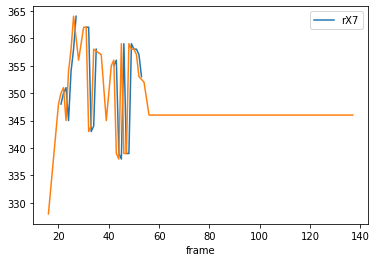

In [ ]:
df_joints.plot(x='frame', y='rX7')
df_joints['rX7'].interpolate().plot()

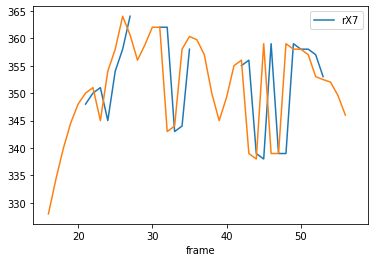

In [ ]:
df_joints.plot(x='frame', y='rX7')
df_joints['rX7'].interpolate(method='akima').plot(x='frame', y='rX1')

In [ ]:
df_joints.plot(x='frame', y='rY7')
df_joints['rY1'].interpolate().plot(x='frame', y='rX1')

In [ ]:
df_joints.plot(x='frame', y='rY7')
df_joints['rY1'].interpolate(method='akima').plot(x='frame', y='rX1')

In [ ]:
print(df_joints['rX1'].count())
df_joints['rX1'].interpolate()
print(df_joints['rX1'].interpolate().count())
print(df_joints['rY1'].count())
df_joints['rX1'].interpolate()
print(df_joints['rY1'].interpolate().count())

34
123
34
123


In [ ]:
df_joints_intlin = df_joints.interpolate()

In [ ]:
df_joints_intlin.index=df_joints_intlin['frame']
df_joints_intlin=df_joints_intlin.drop('frame',axis=1)

In [ ]:
df_joints.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            129, 130, 131, 132, 133, 134, 135, 136, 137, 138],
           dtype='int64', name='frame', length=138)

In [ ]:
df_joints.index=df_joints['frame']

In [ ]:
a=df_joints.iloc[:,].interpolate(method='akima')
df_joints['rX0'].plot()
# df_joints['pX1'].interpolate(method='akima').plot()

In [ ]:
df_joints.iloc[:,1]

In [ ]:
b=df_joints.iloc[:,190].interpolate(method='akima')

In [ ]:
for i in range(0,273):
  b=pd.concat([b,df_joints.iloc[:,0+i].interpolate(method='akima')],axis=1)
  

In [ ]:
df_joints

pX0  pY0  pX1  pY1  pX2  pY2  ...  lX18  lY18  lX19  lY19  lX20  lY20
frame                                ...                                    
1      401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
2      401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
3      401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
5      401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
134    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
135    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
136    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
137    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
138    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN

[138 rows x 274 columns]

In [ ]:
b

pX0  pY0  pX1  pY1  pX2  pY2  ...  rX18  rY18  rX19  rY19  rX20  rY20
frame                                ...                                    
1      401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
2      401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
3      401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      401   98  399  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
5      401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
134    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
135    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
136    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
137    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN
138    401   98  400  182  331  183  ...   NaN   NaN   NaN   NaN   NaN   NaN

[138 rows x 232 columns]

In [ ]:
(b.iloc[:,0])

frame
1      401
2      401
3      401
4      401
5      401
      ... 
134    401
135    401
136    401
137    401
138    401
Name: pX0, Length: 138, dtype: int64

In [ ]:
a

rX0        rY0  rX1  rY1  rX2  ...  rY18  rX19  rY19  rX20  rY20
frame                                        ...                              
1             NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
2             NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
3      313.000000  356.00000  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
4      312.615636  356.21875  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
5      312.329504  356.37500  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
...           ...        ...  ...  ...  ...  ...   ...   ...   ...   ...   ...
134           NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
135           NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
136           NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
137           NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN
138           NaN        NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN

[138 rows x 42 columns]

#pose dataframe visualization


In [ ]:
# df_joints=df_joints.drop('frame',axis=1)
df_joints=df_joints.drop_duplicates()

In [ ]:
df_joints.shape

## plot first frame

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

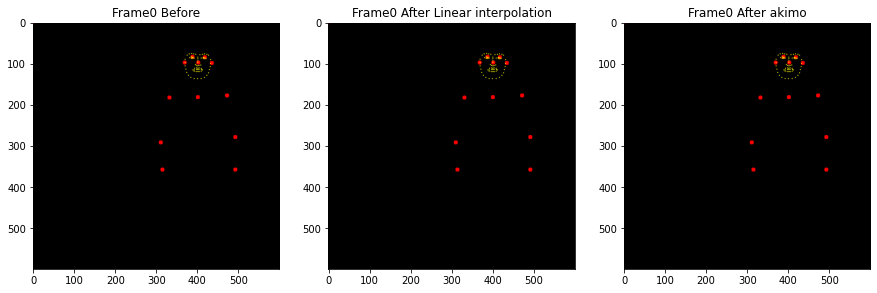

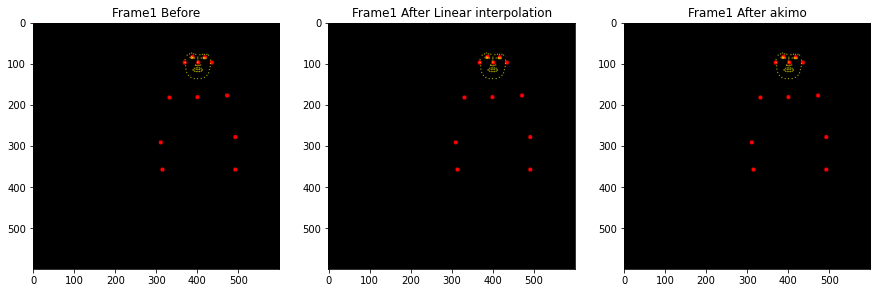

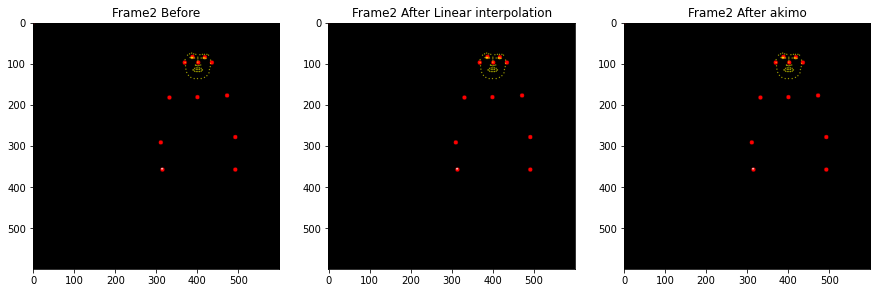

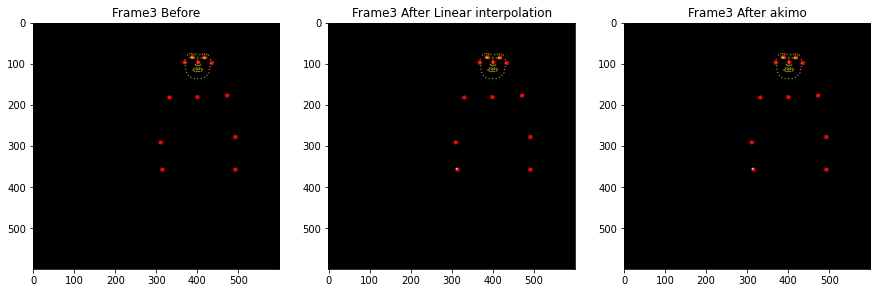

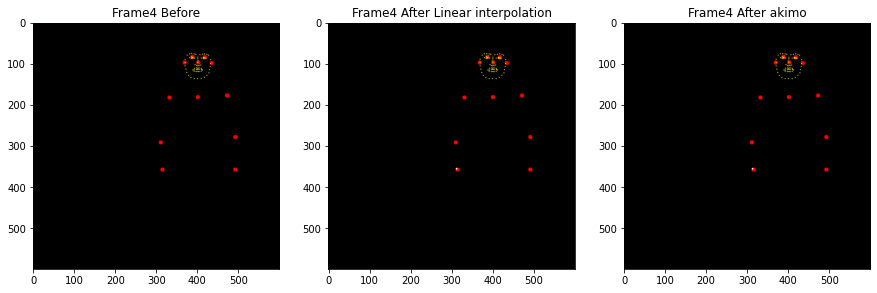

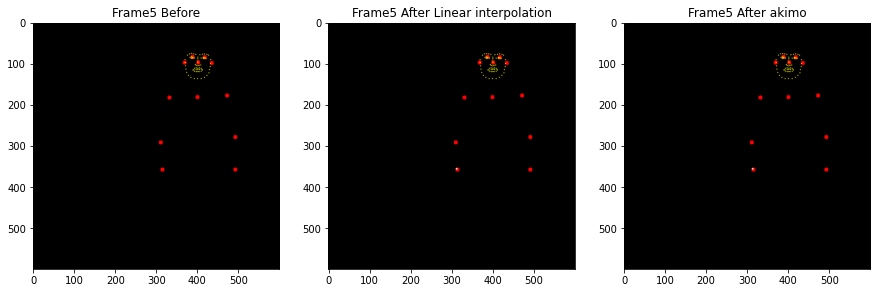

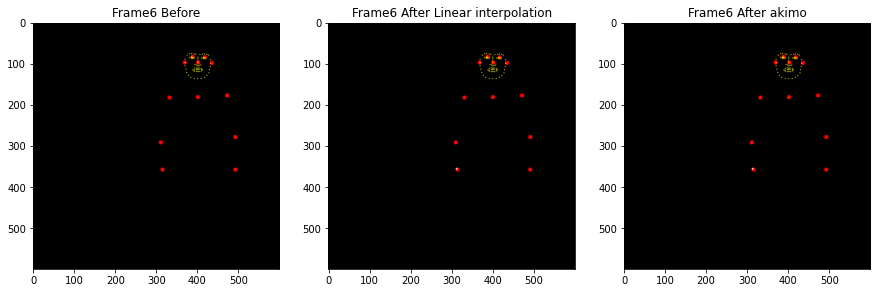

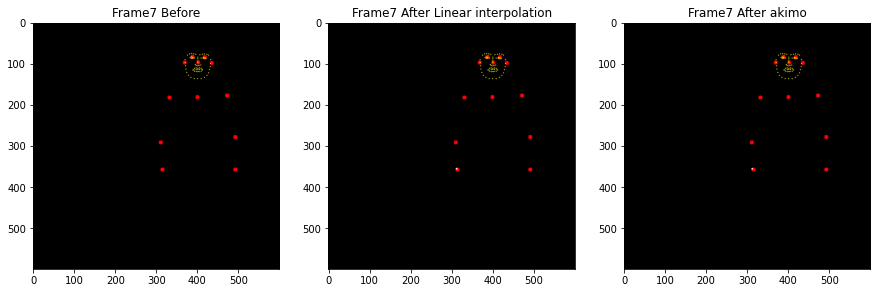

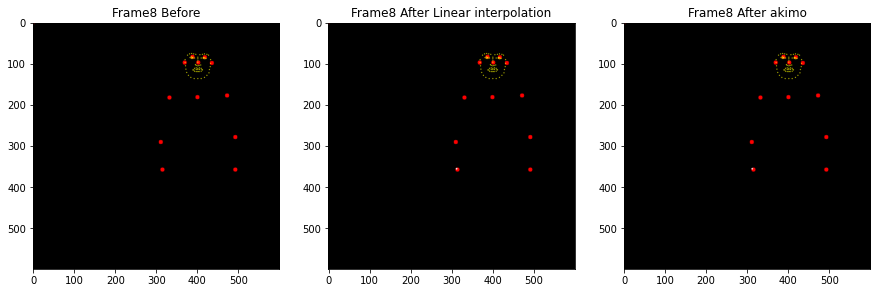

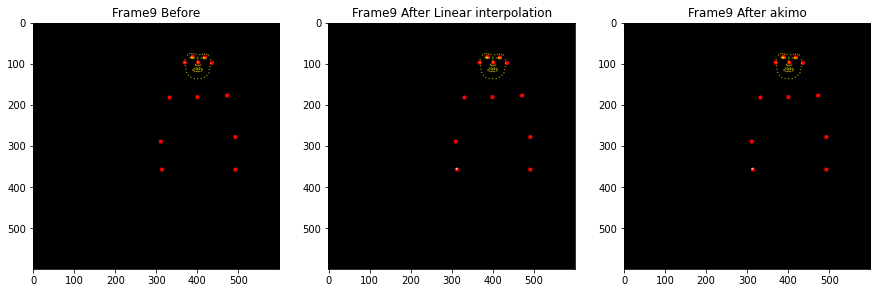

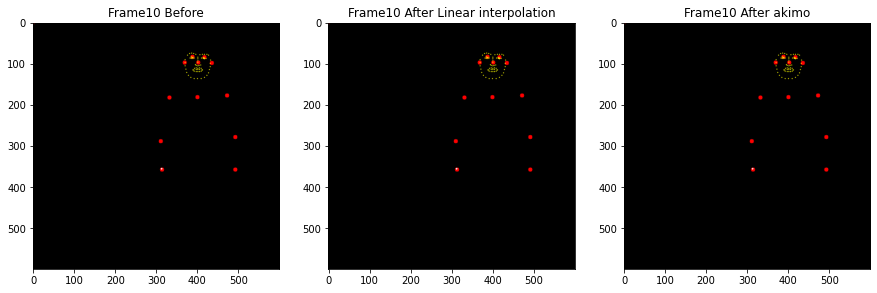

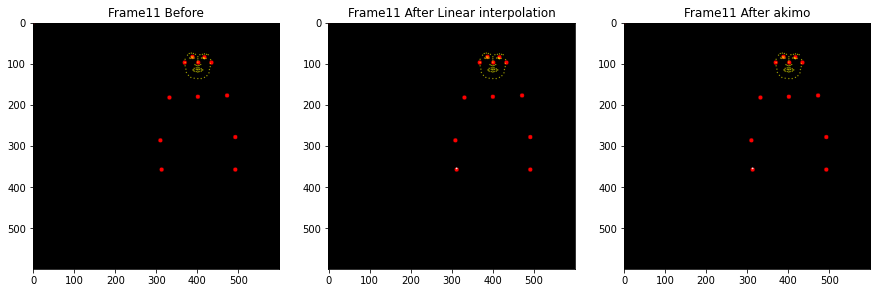

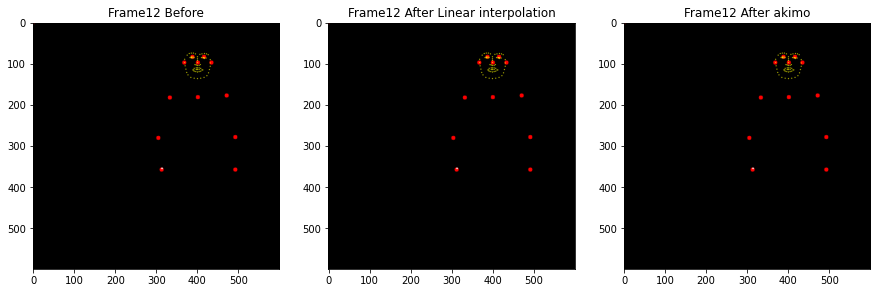

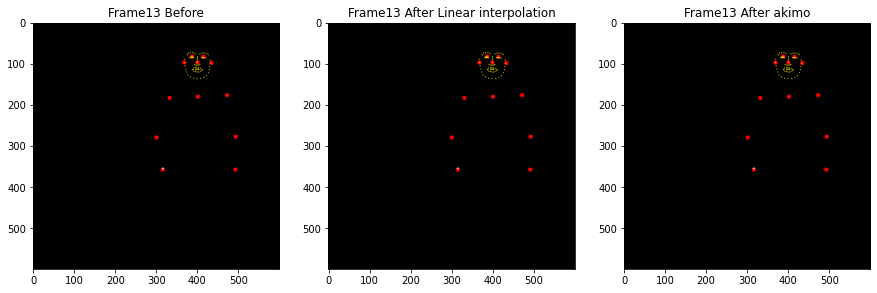

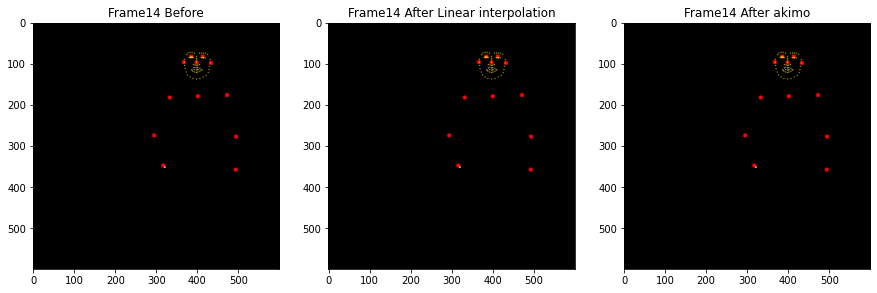

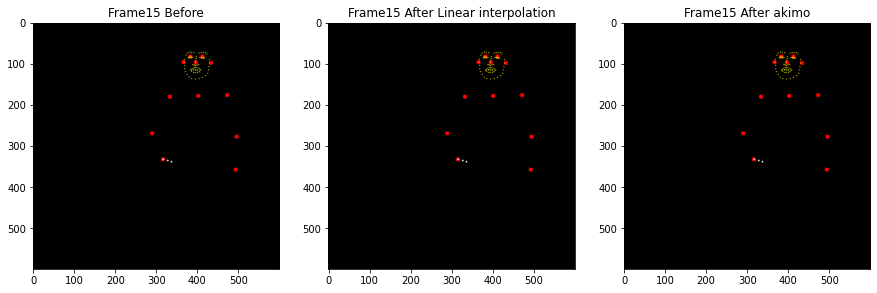

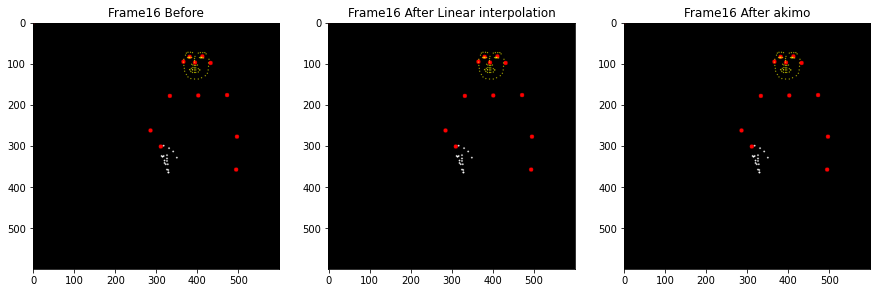

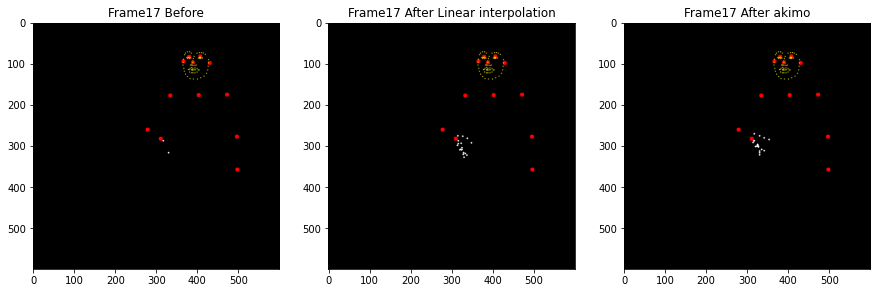

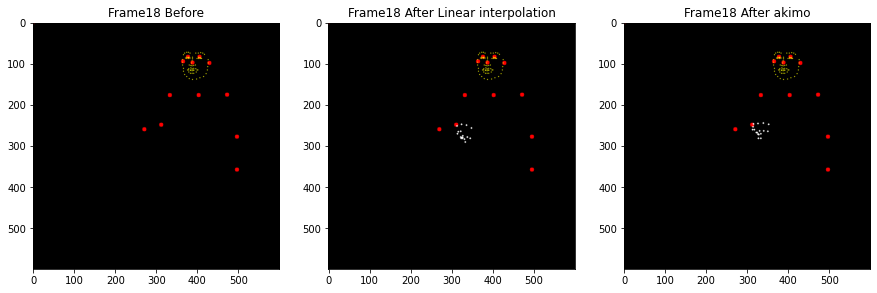

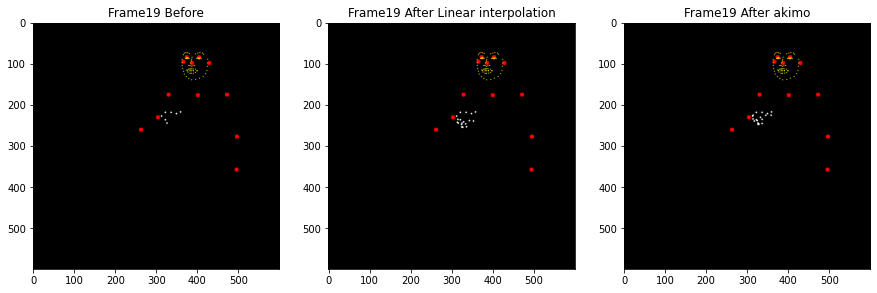

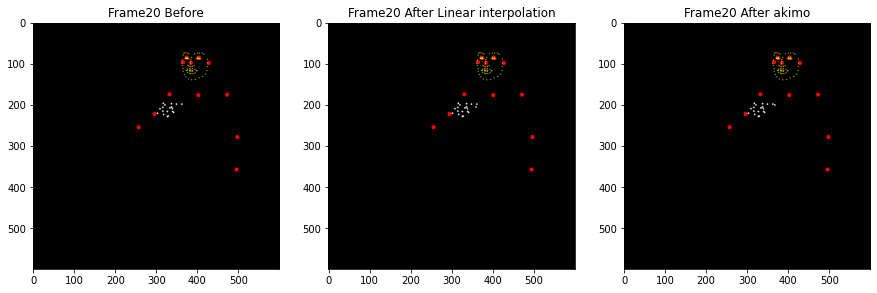

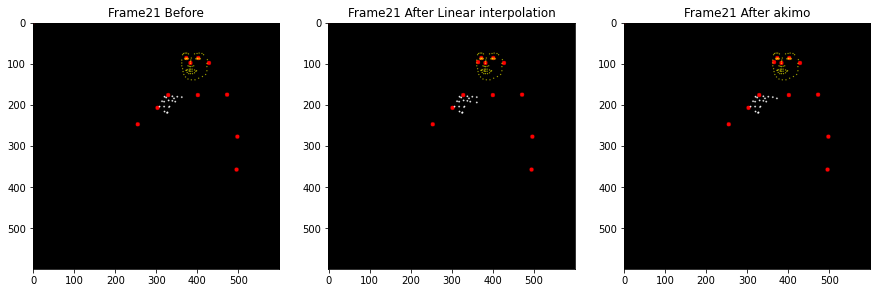

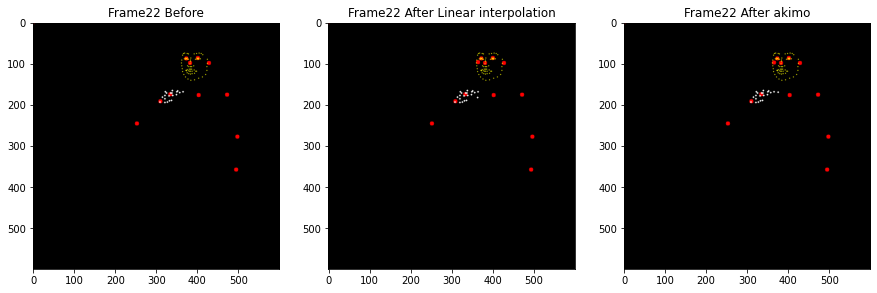

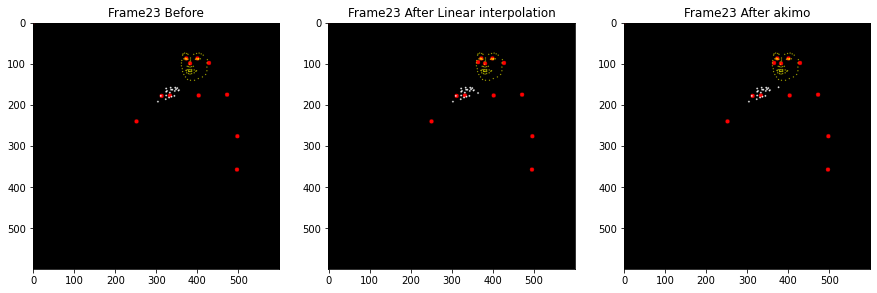

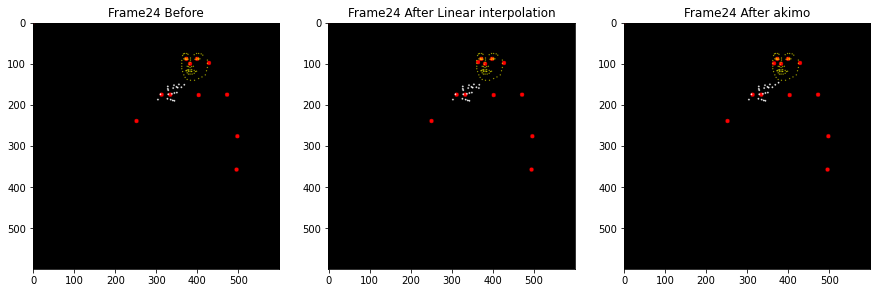

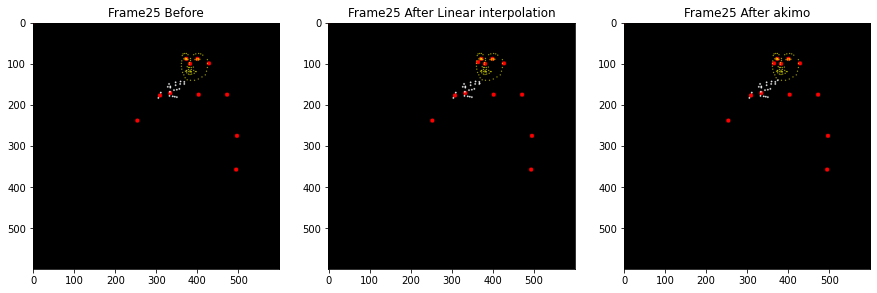

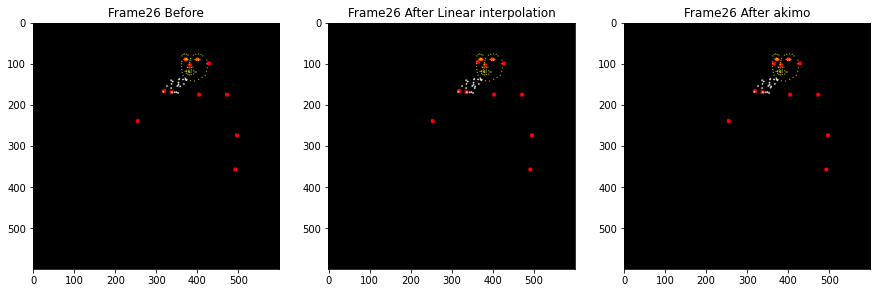

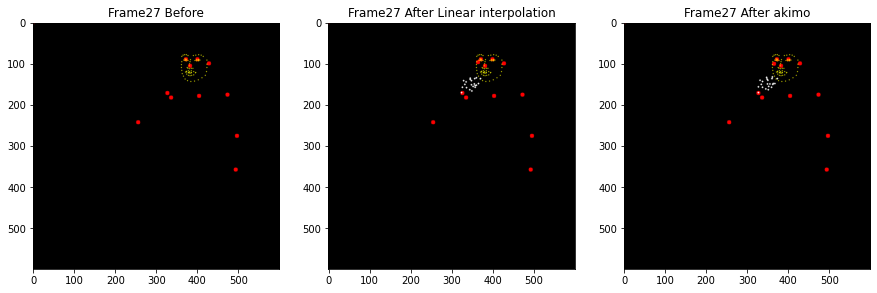

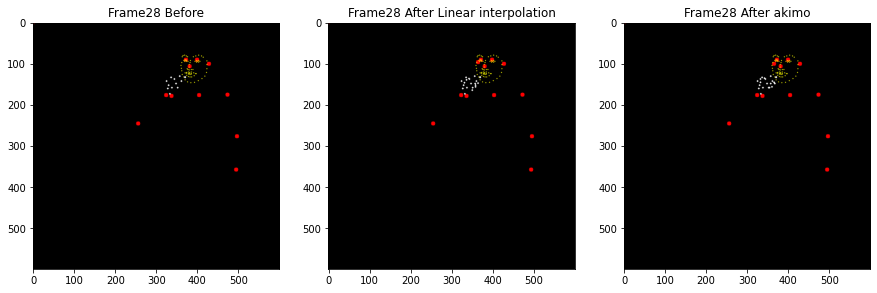

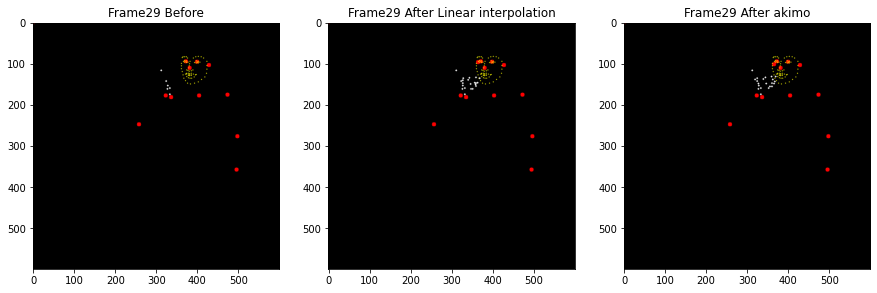

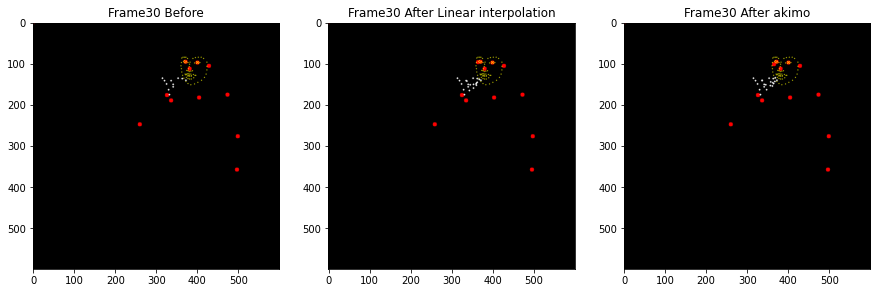

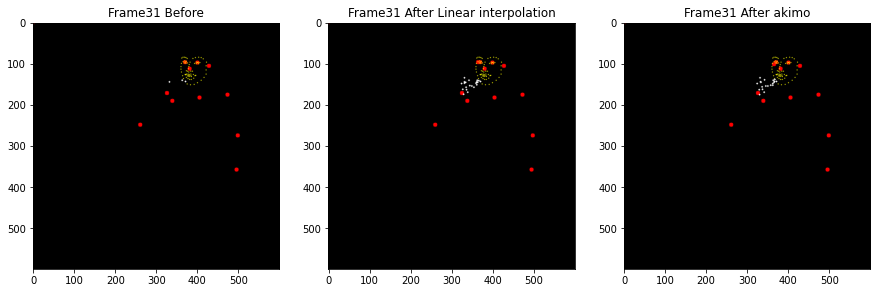

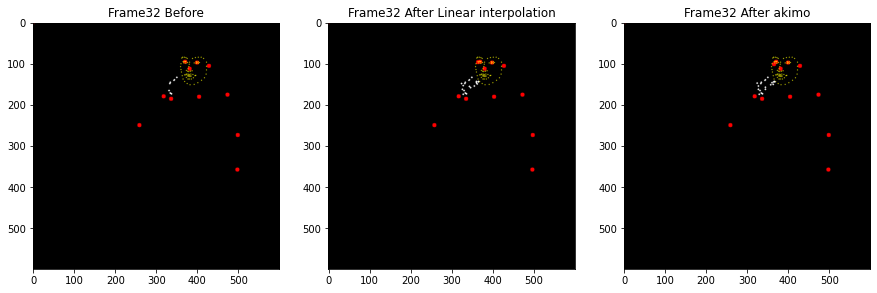

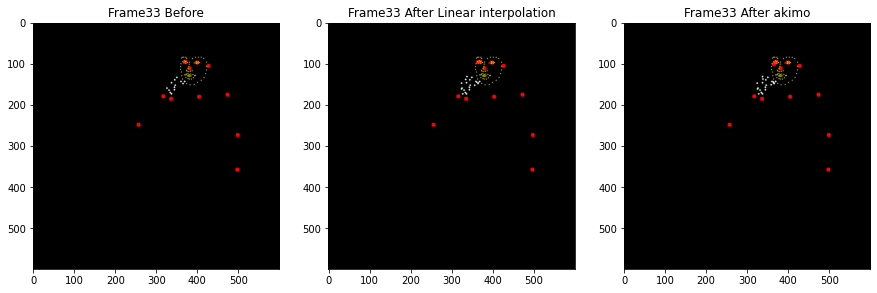

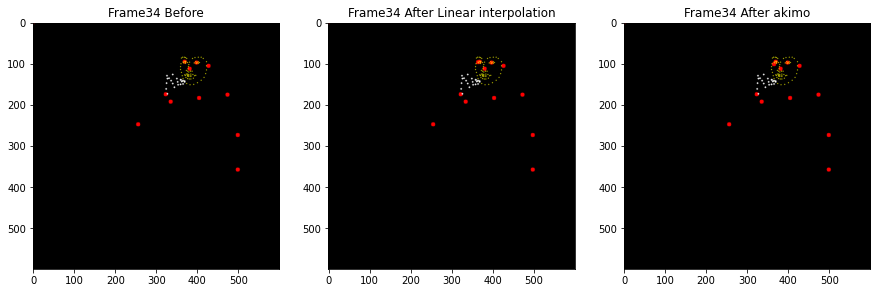

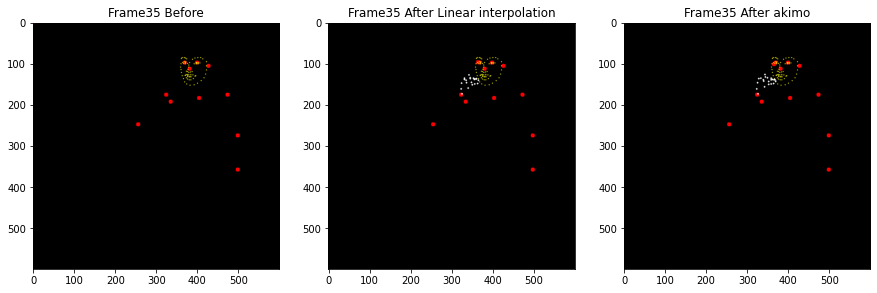

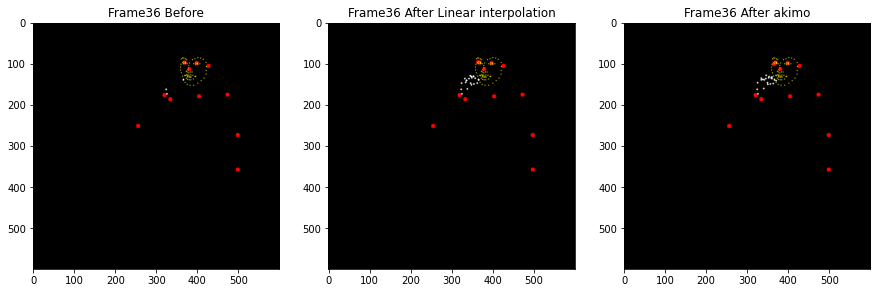

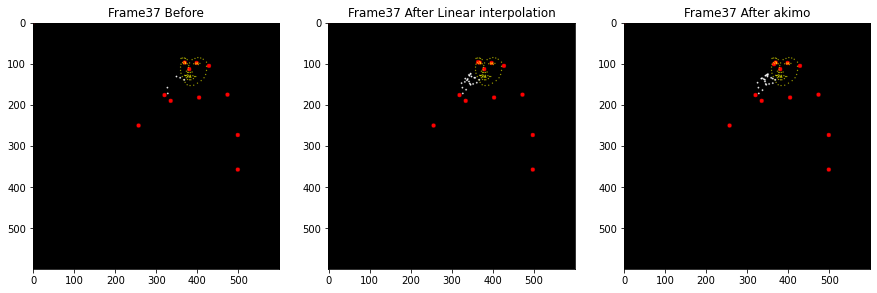

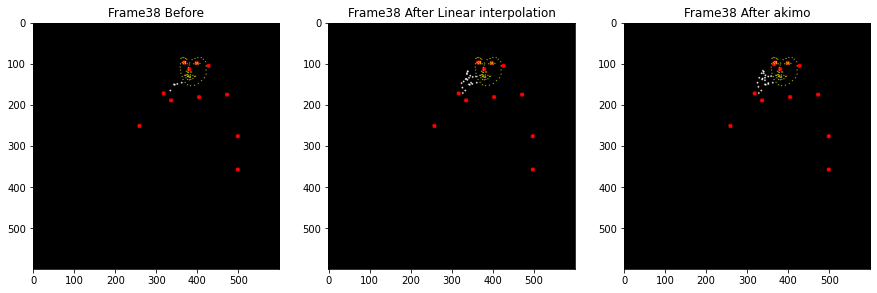

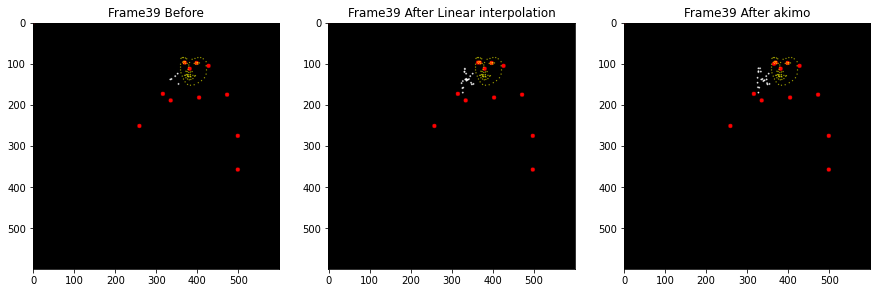

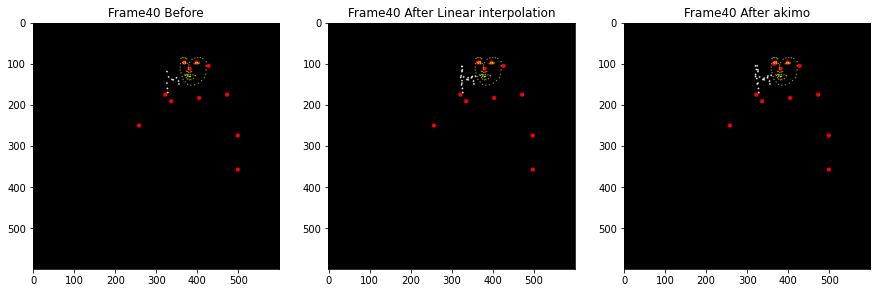

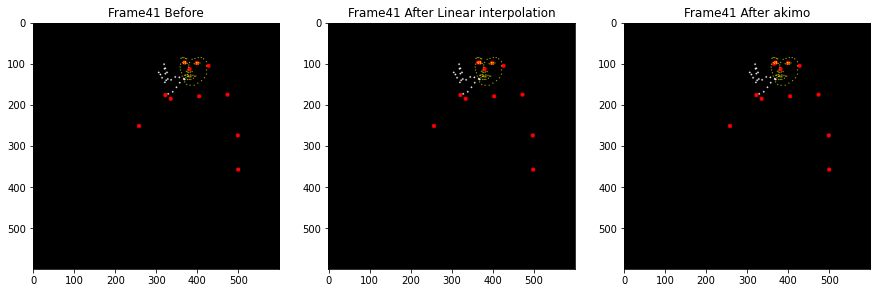

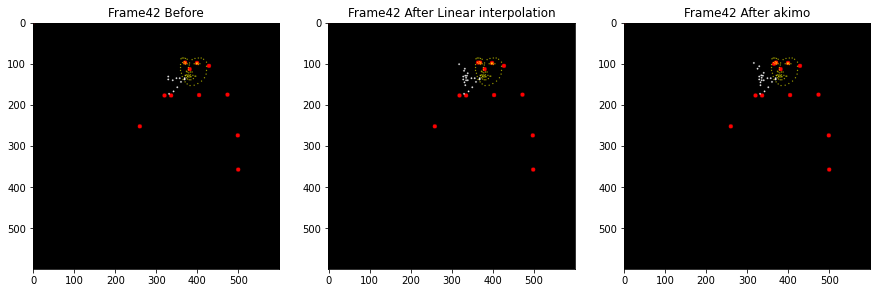

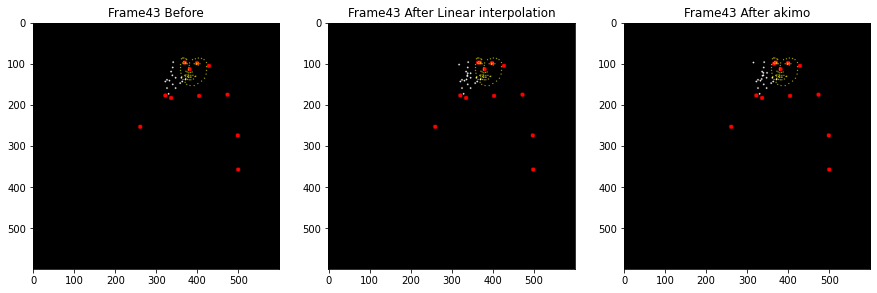

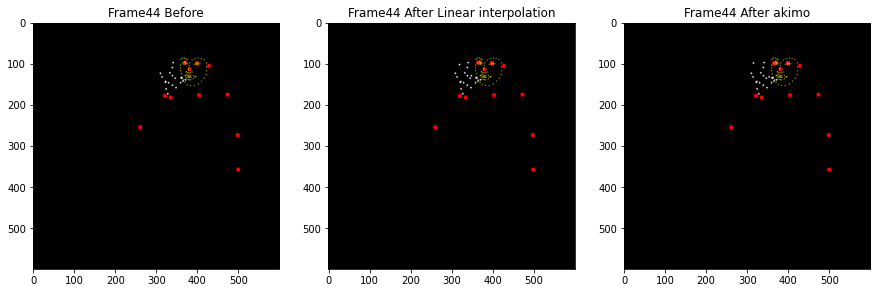

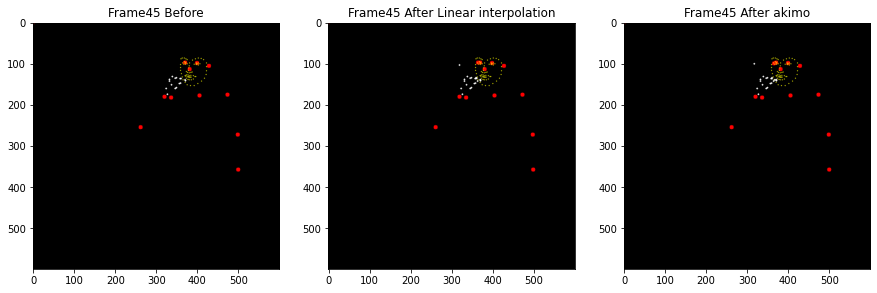

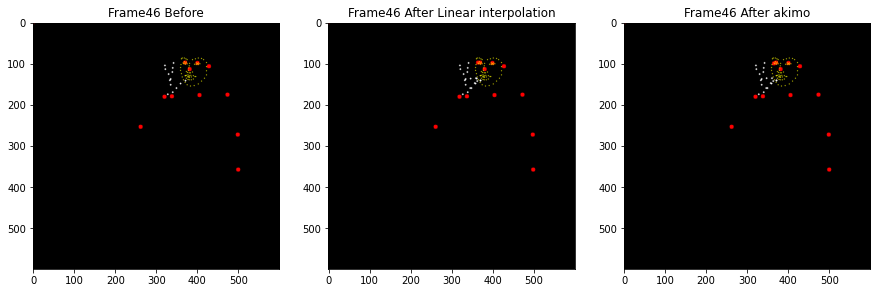

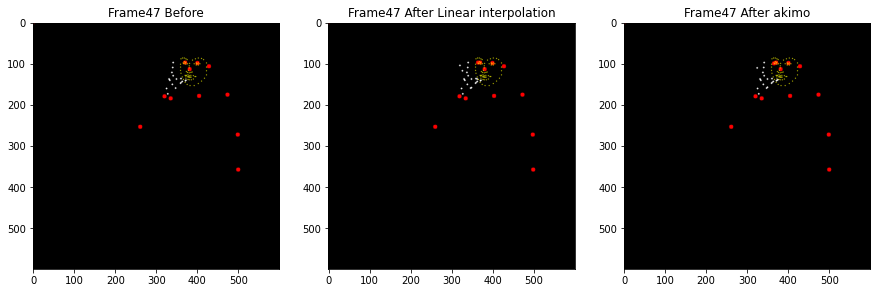

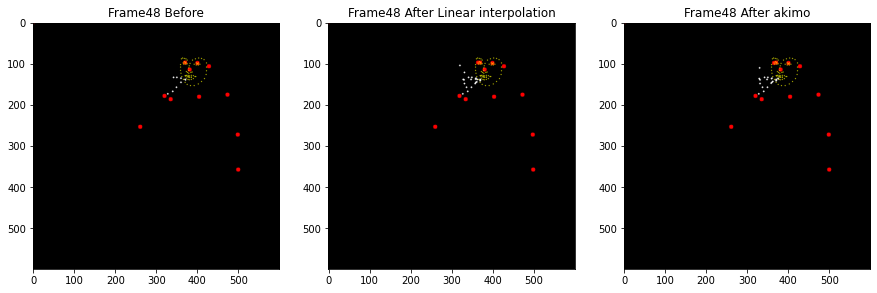

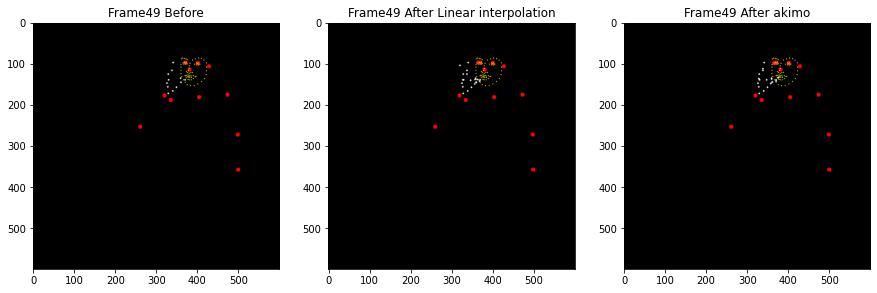

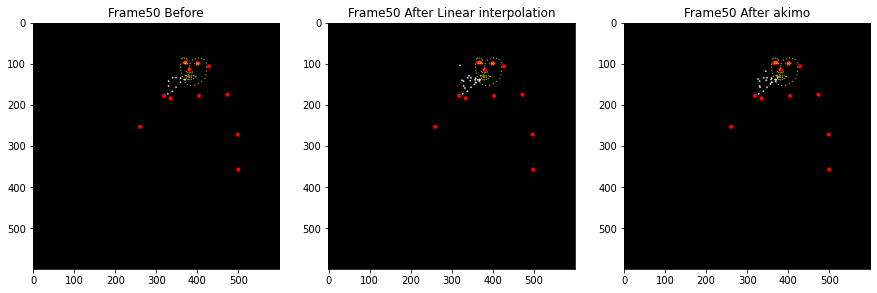

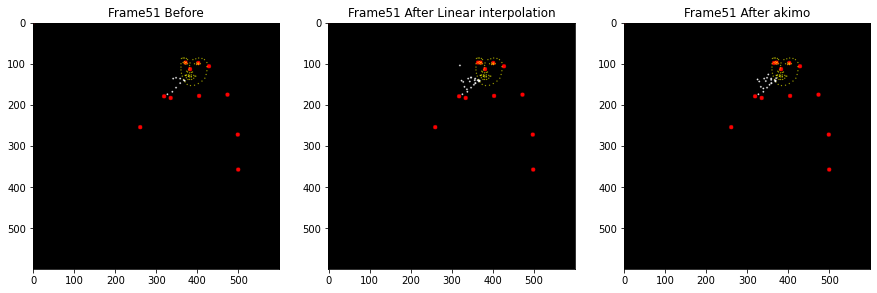

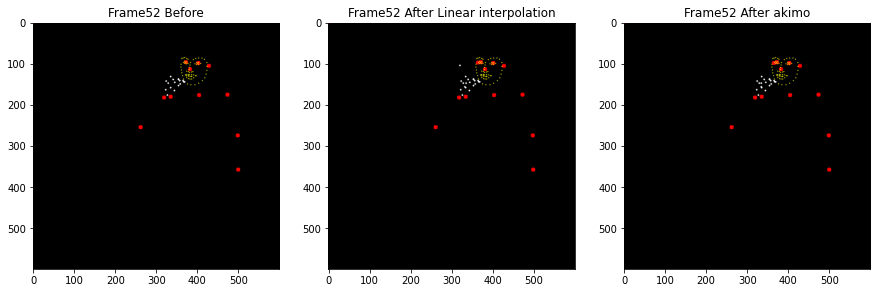

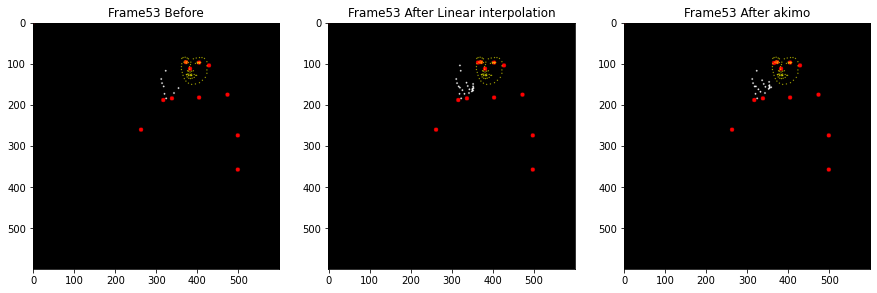

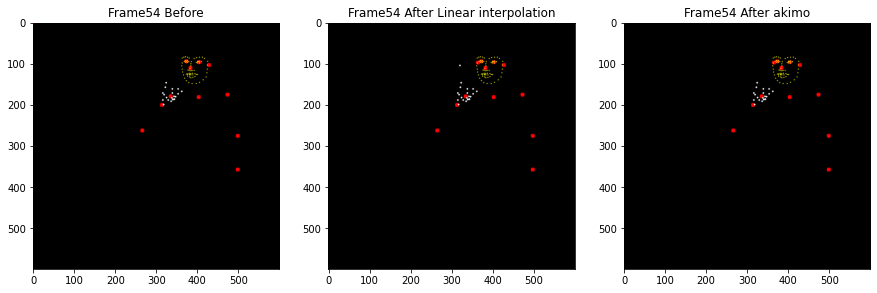

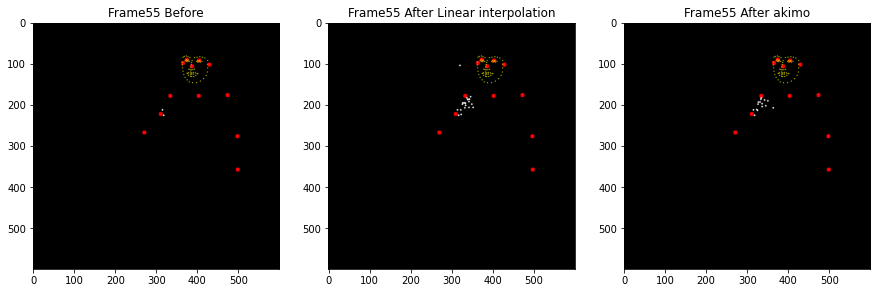

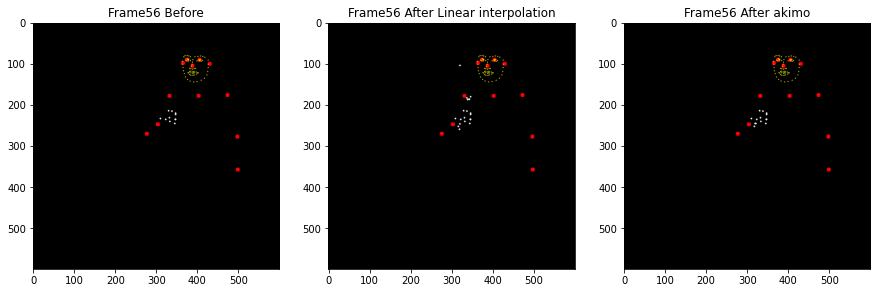

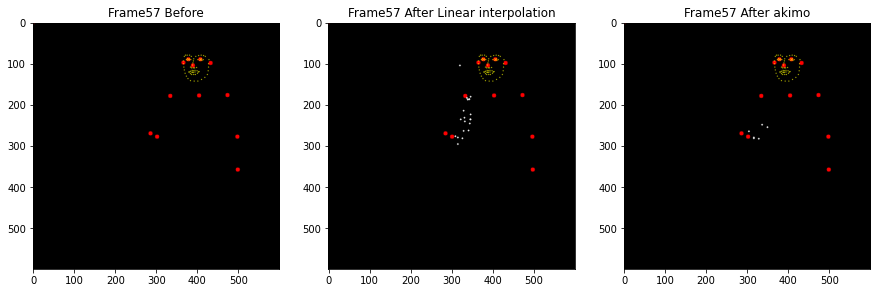

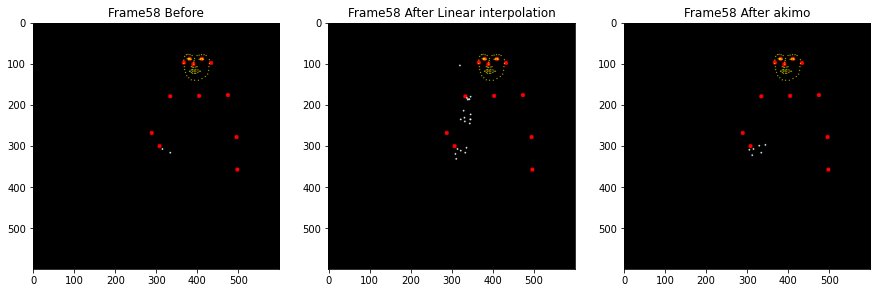

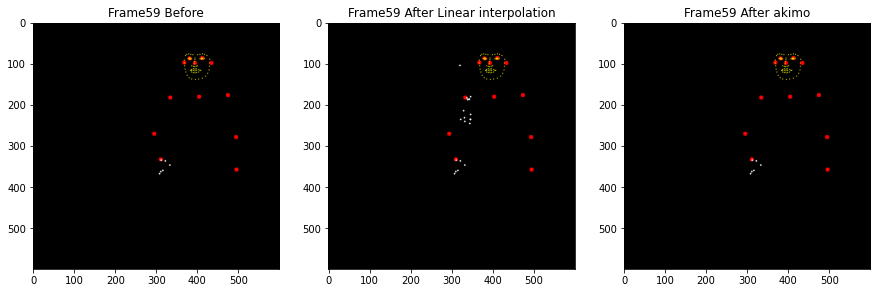

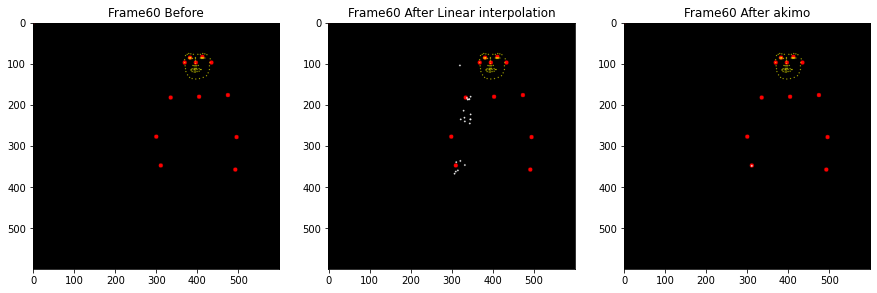

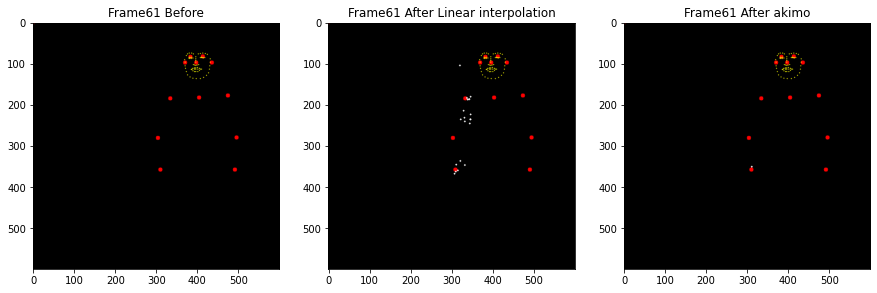

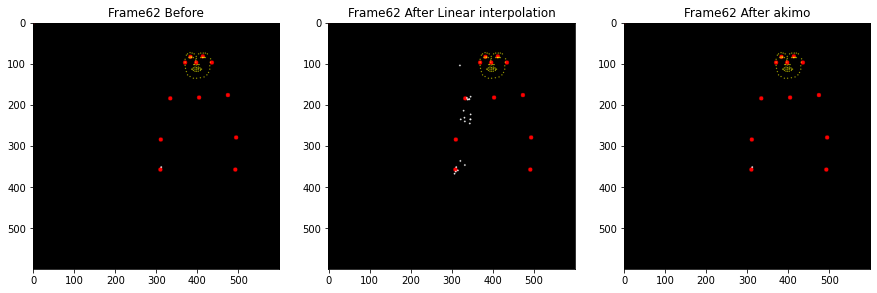

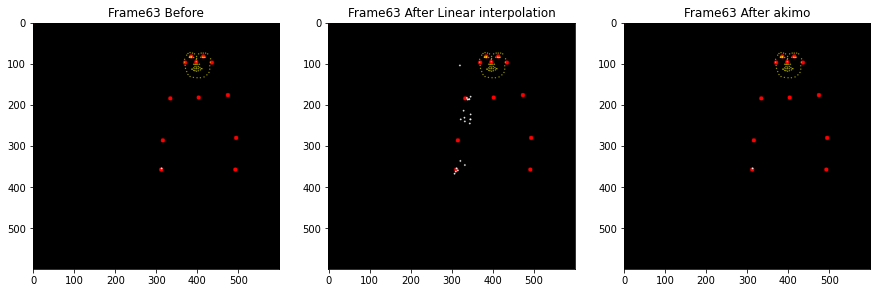

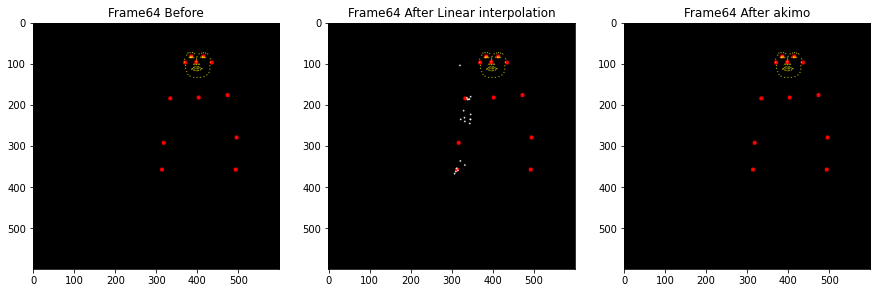

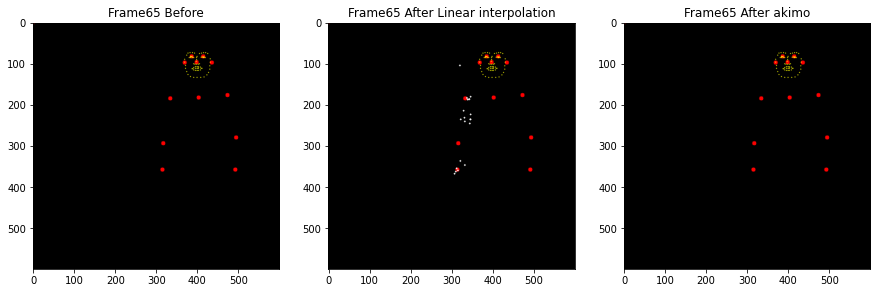

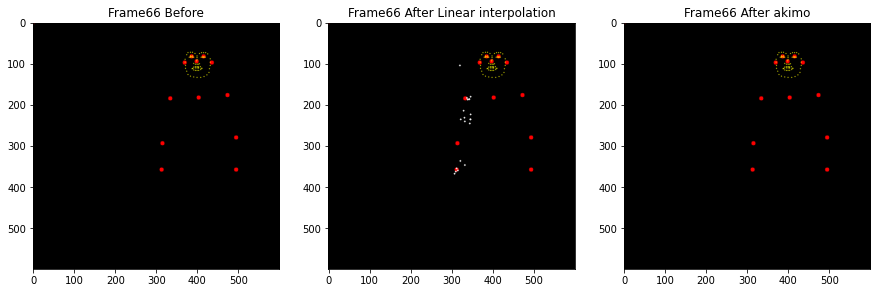

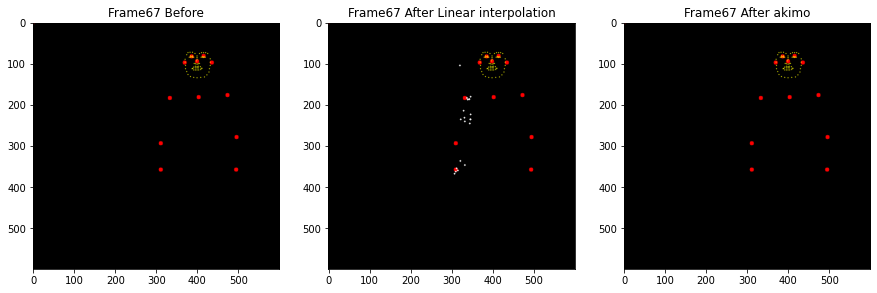

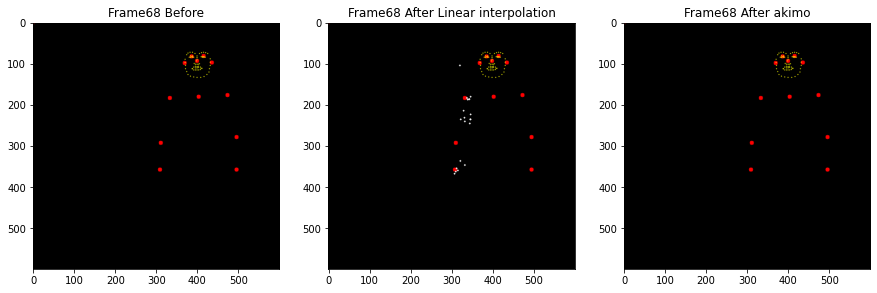

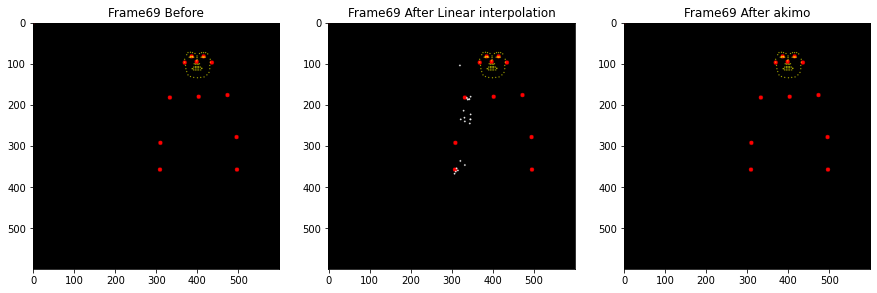

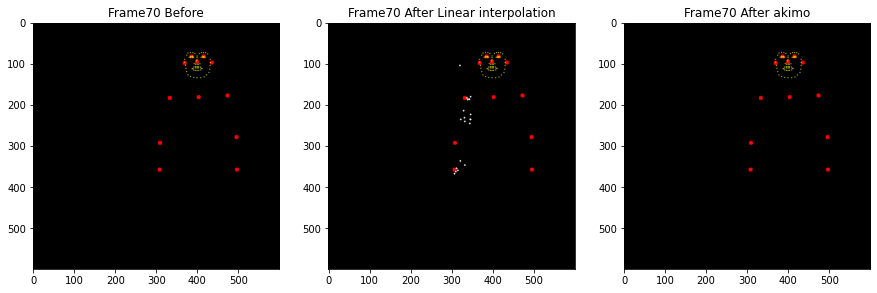

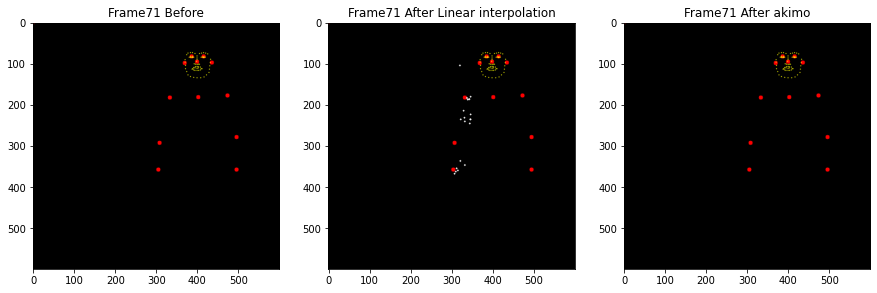

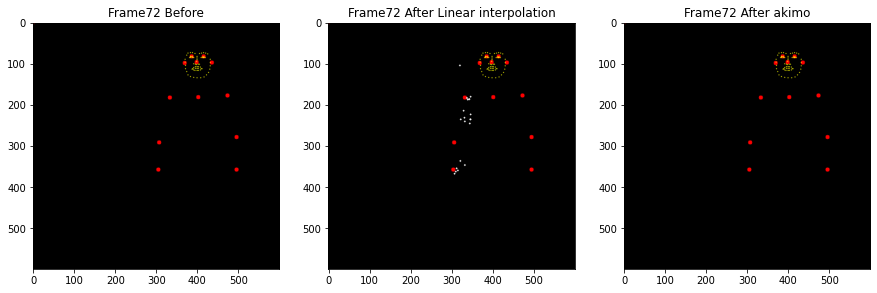

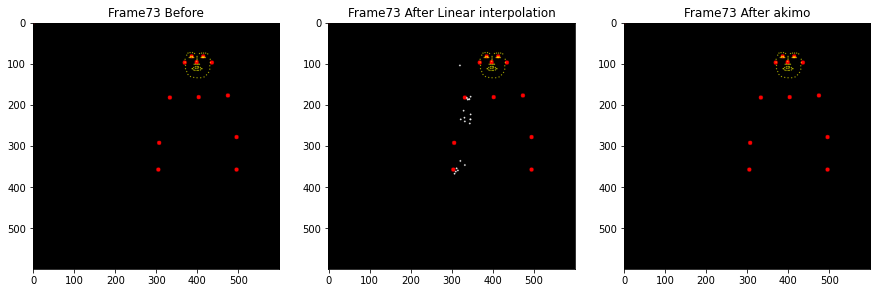

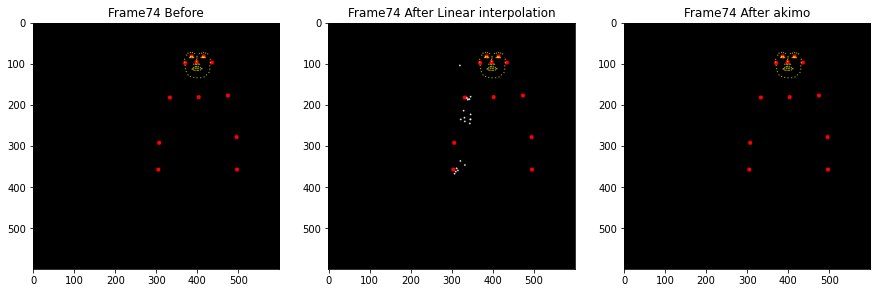

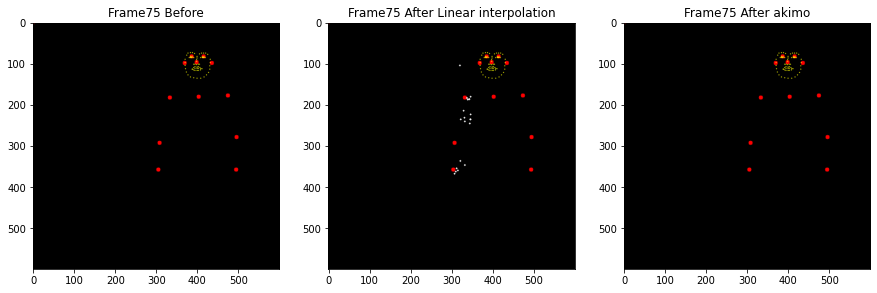

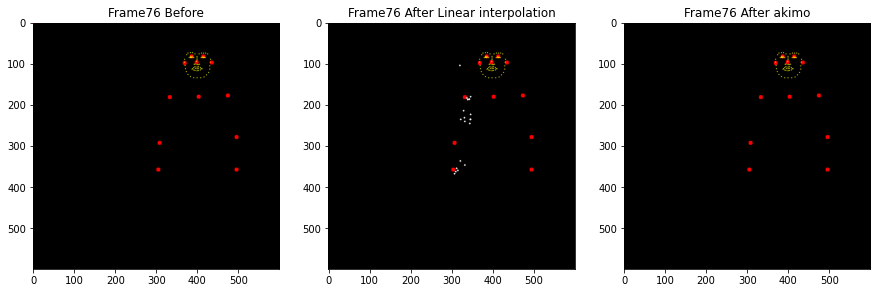

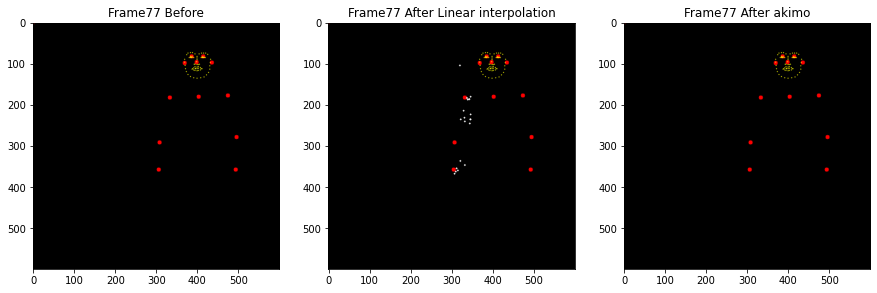

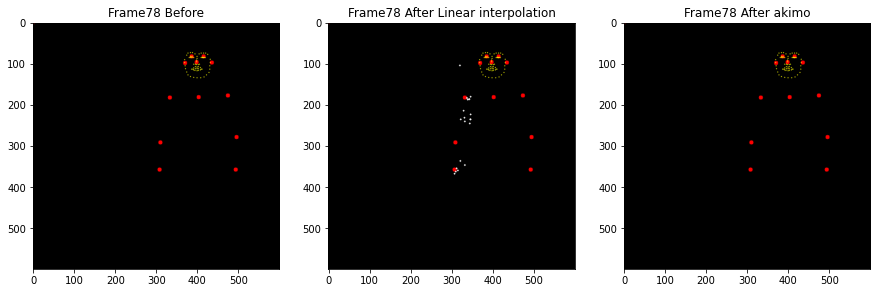

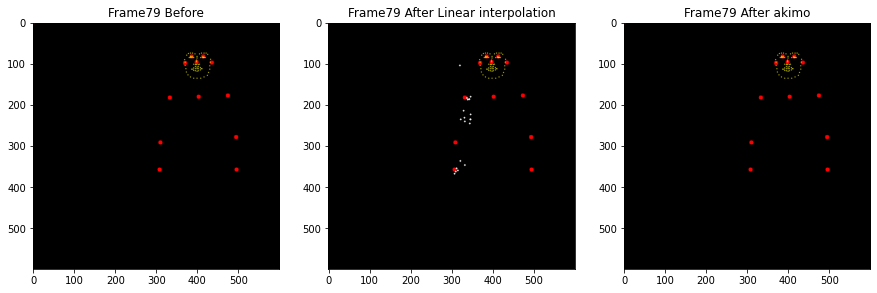

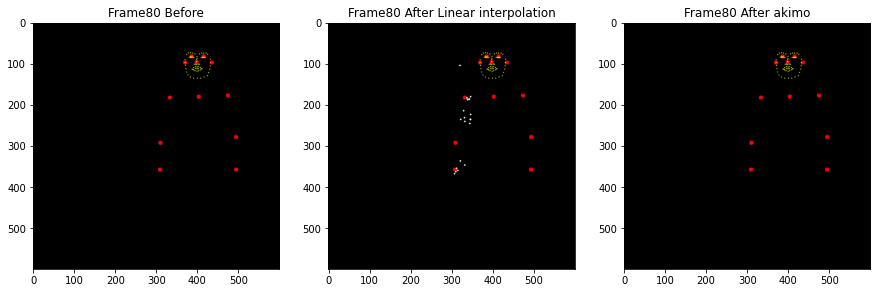

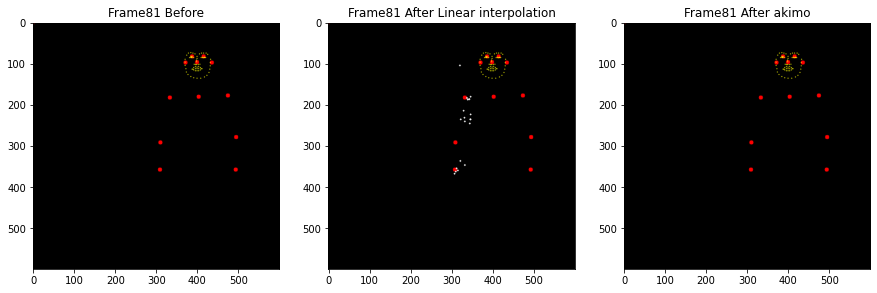

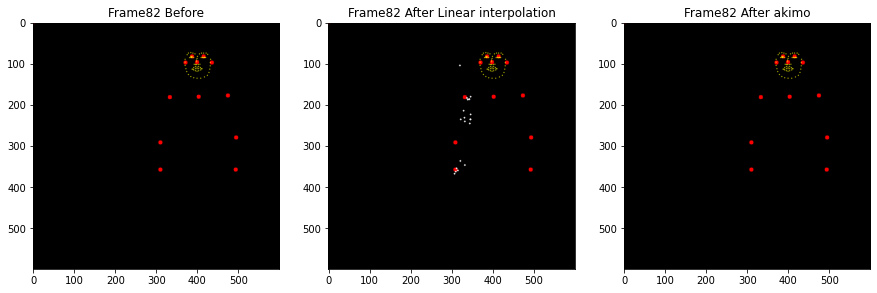

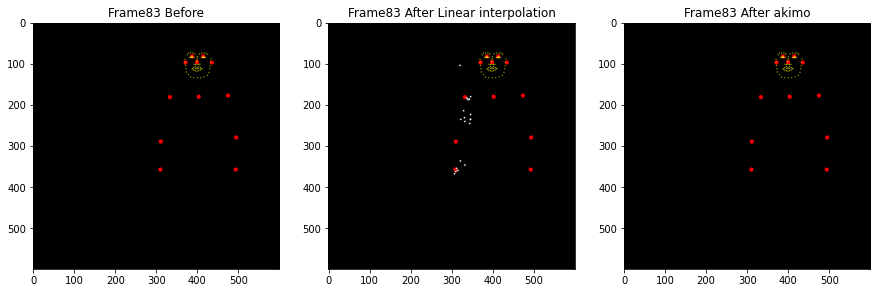

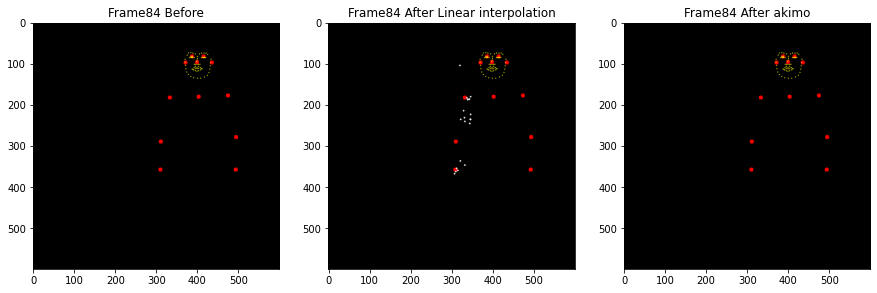

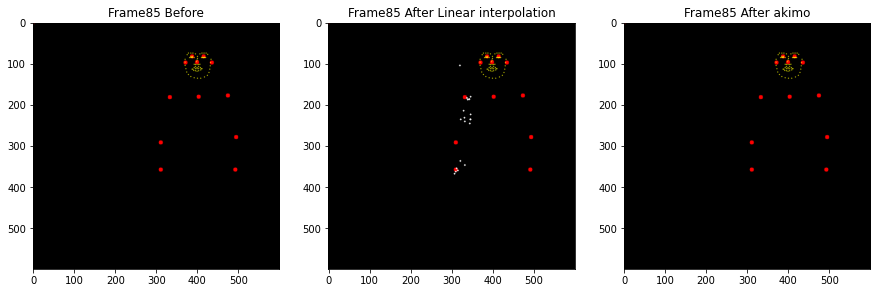

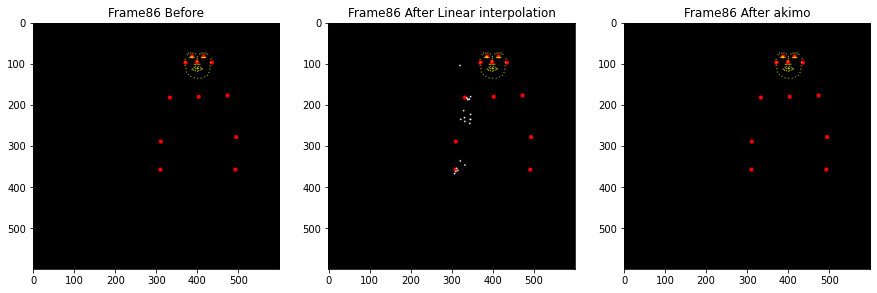

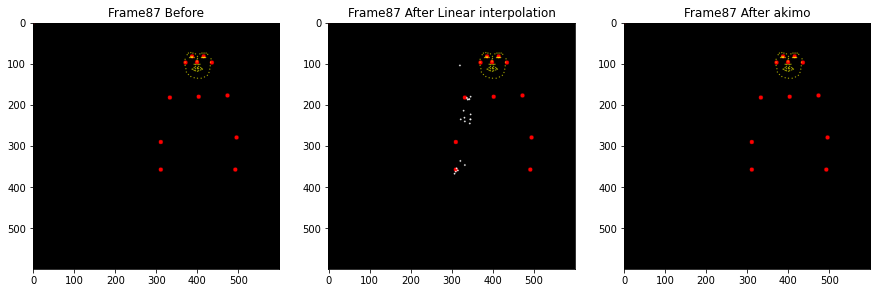

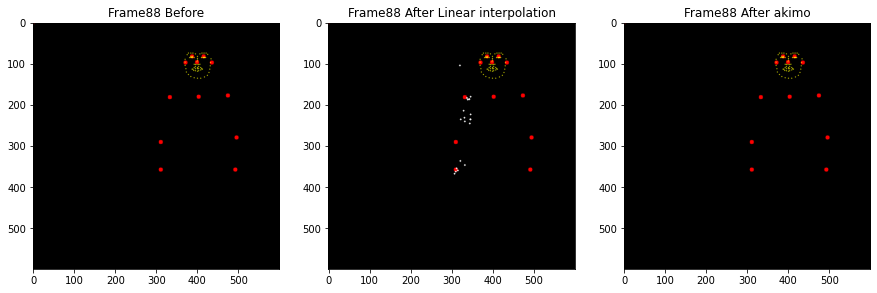

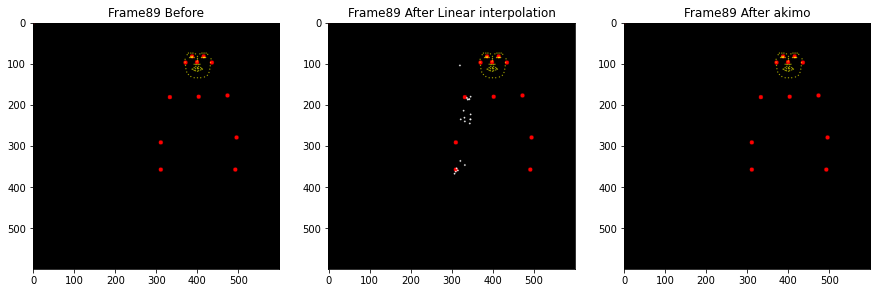

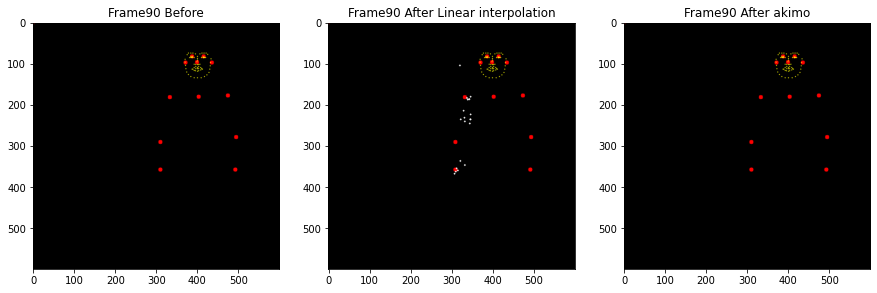

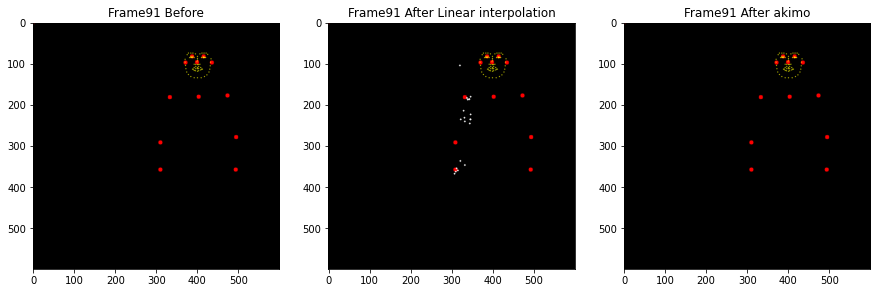

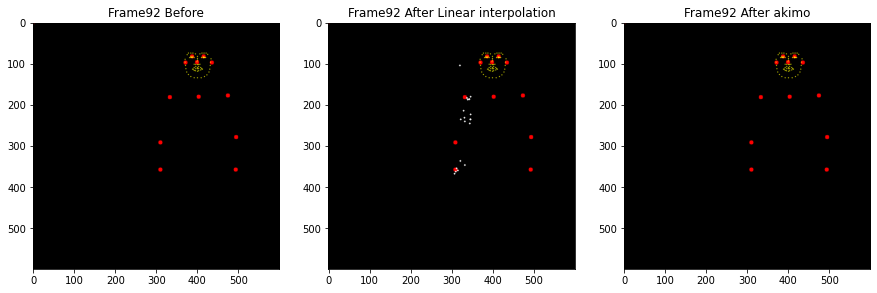

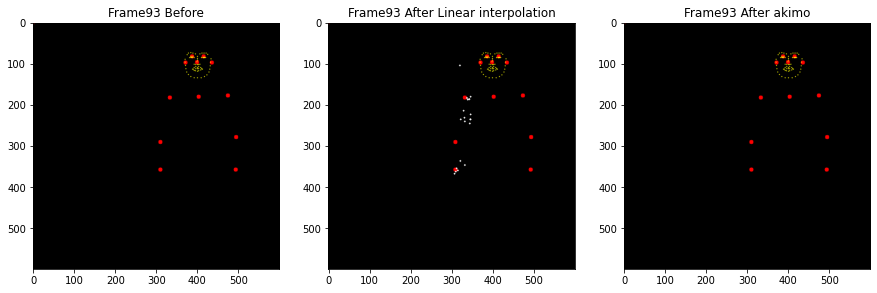

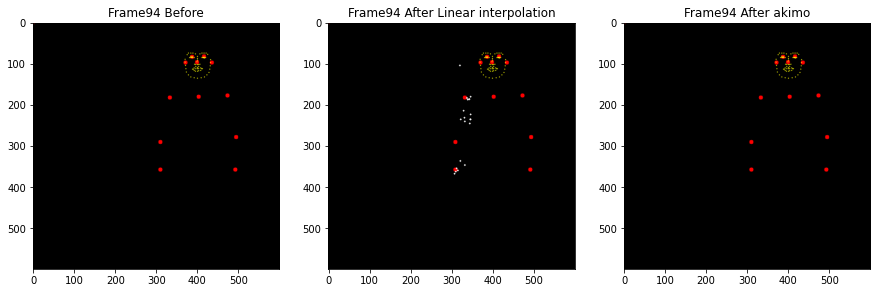

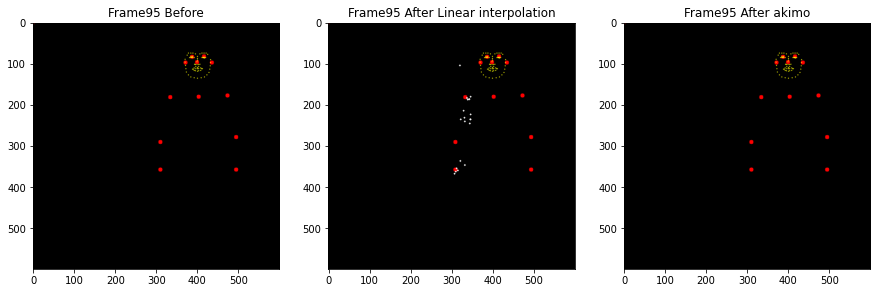

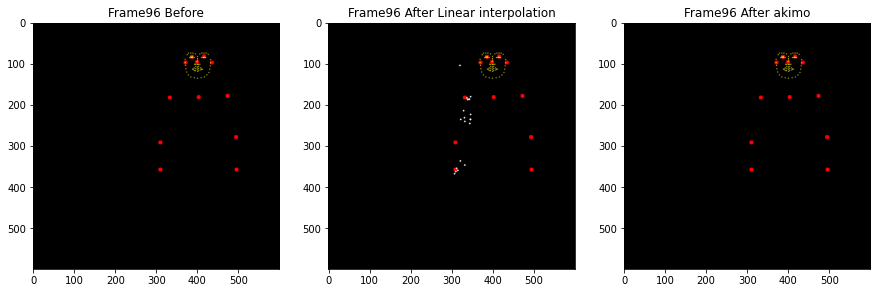

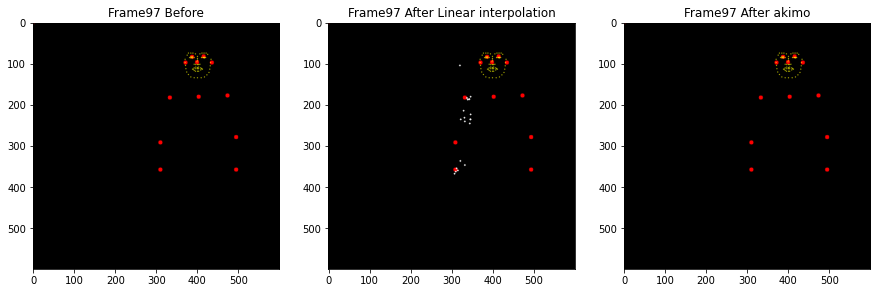

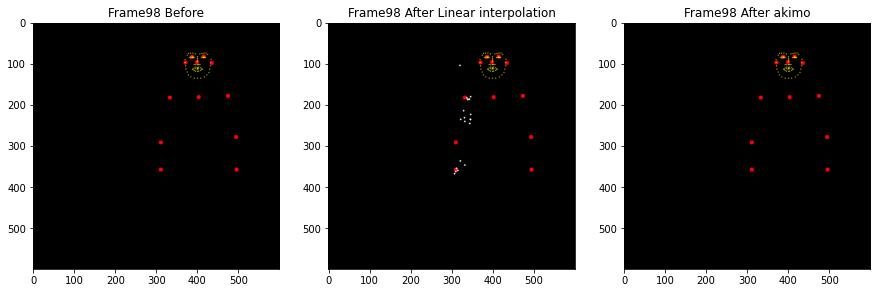

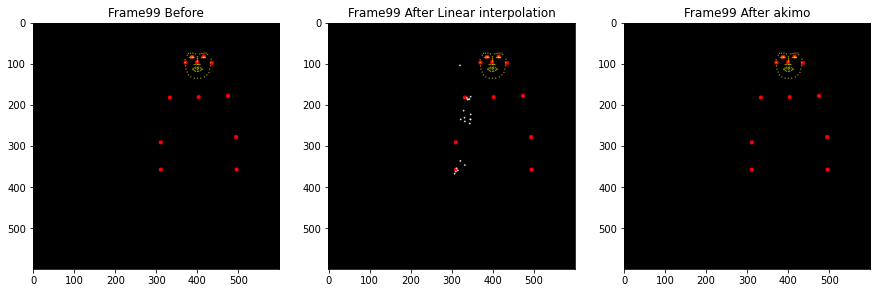

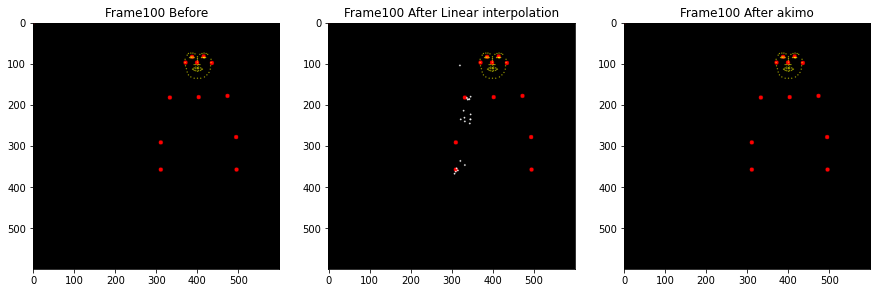

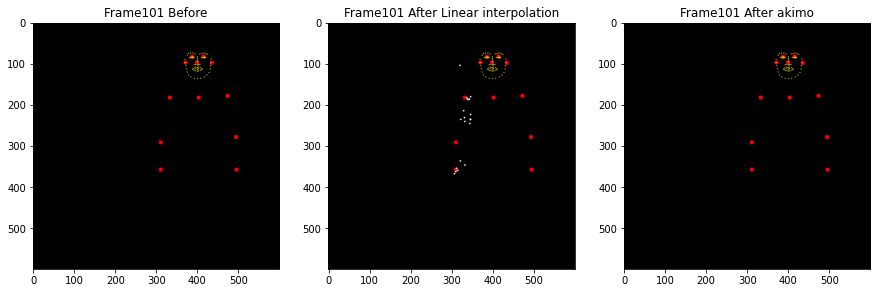

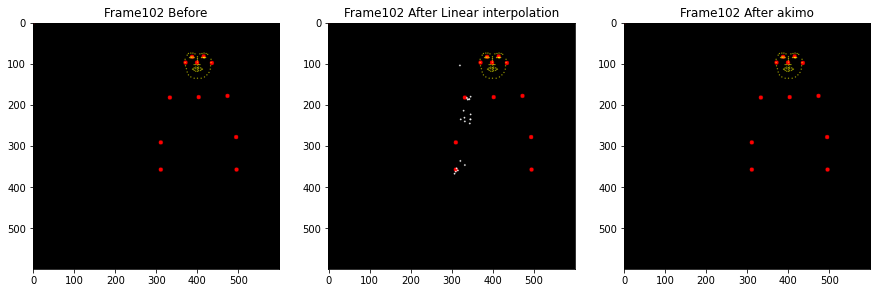

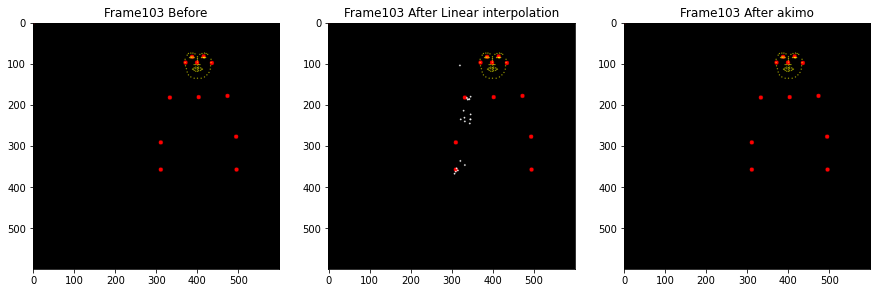

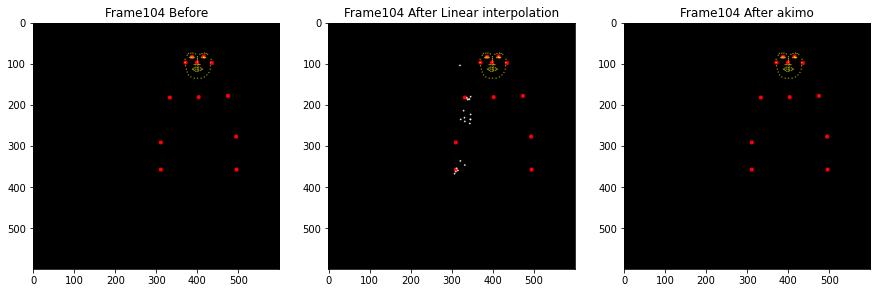

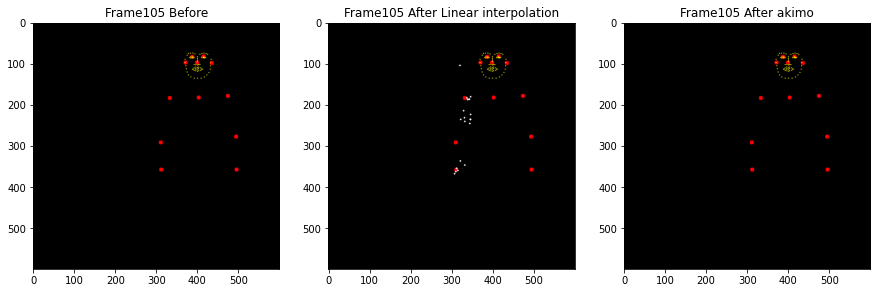

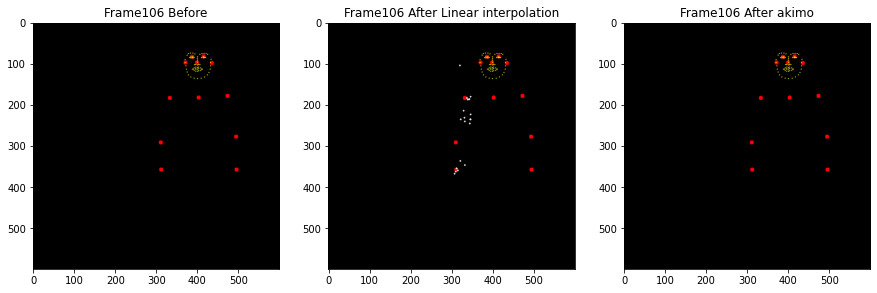

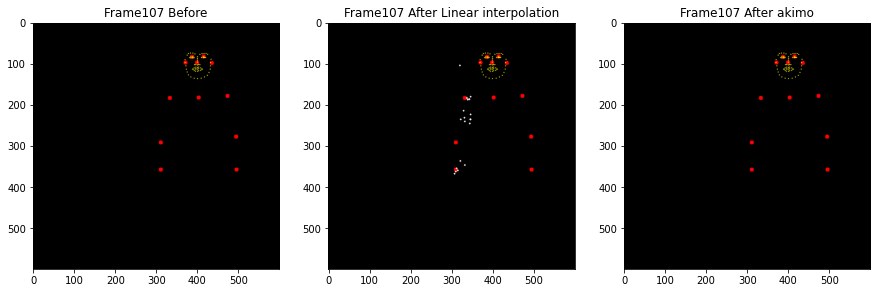

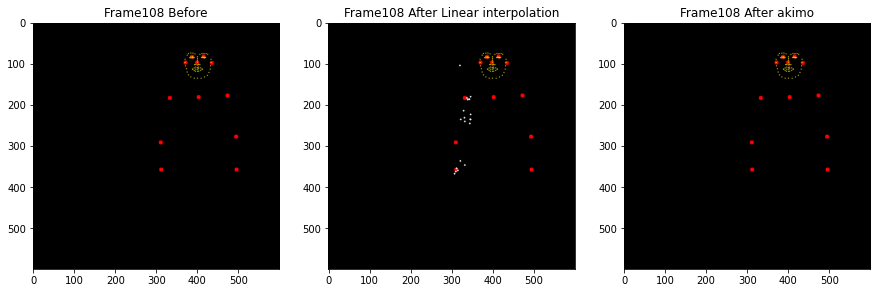

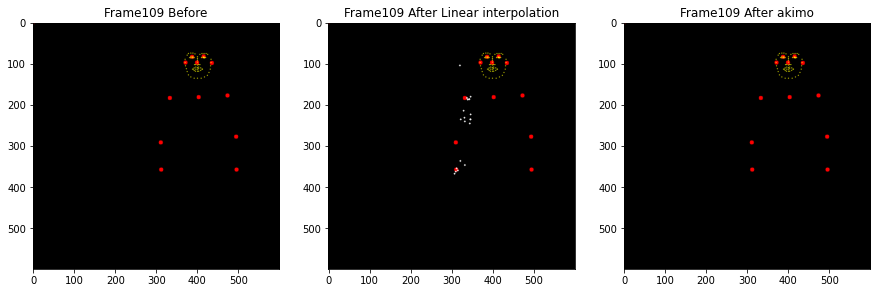

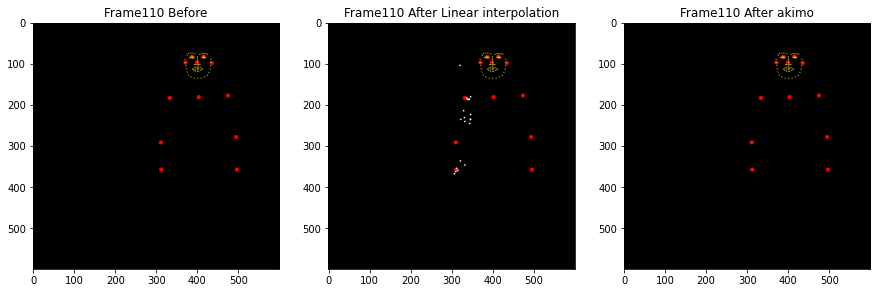

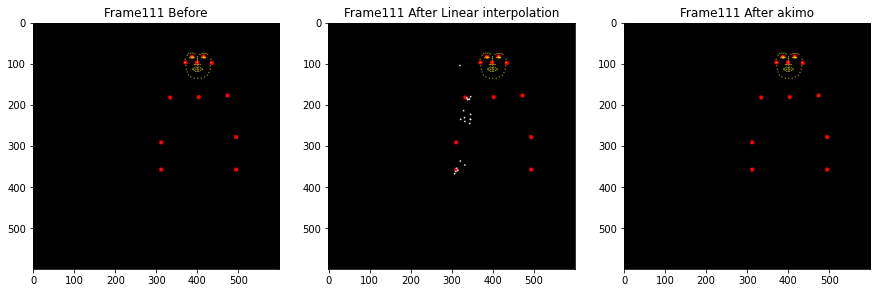

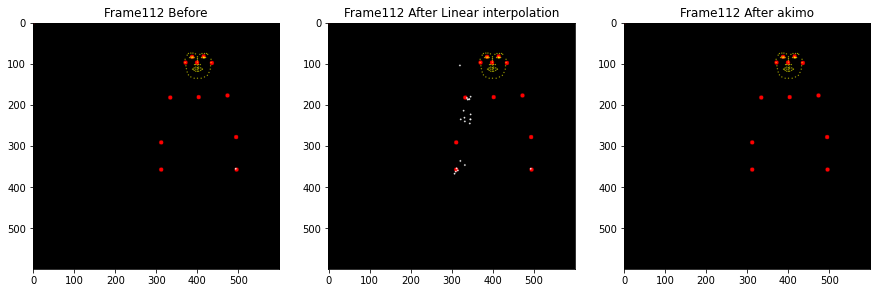

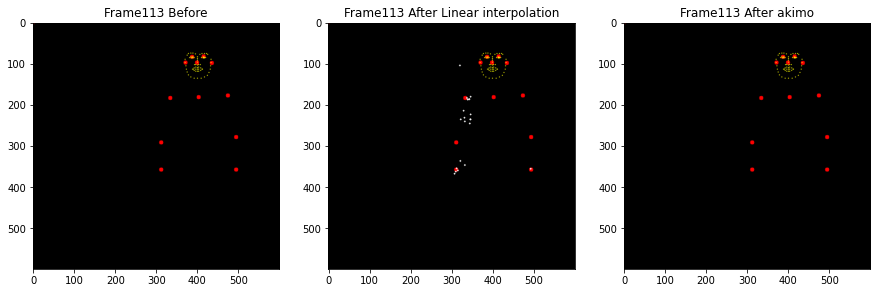

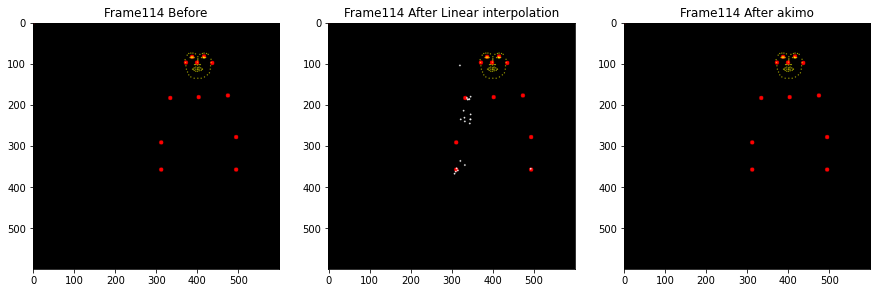

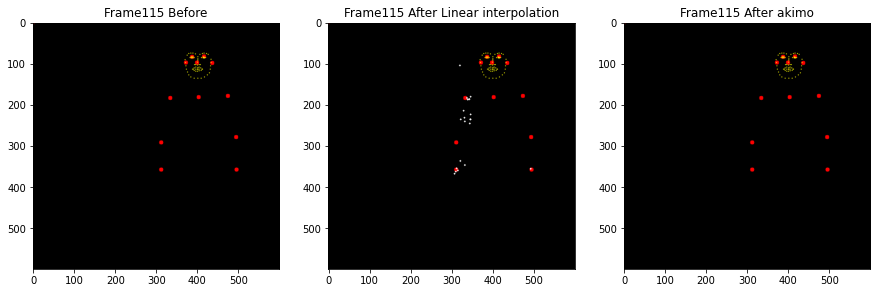

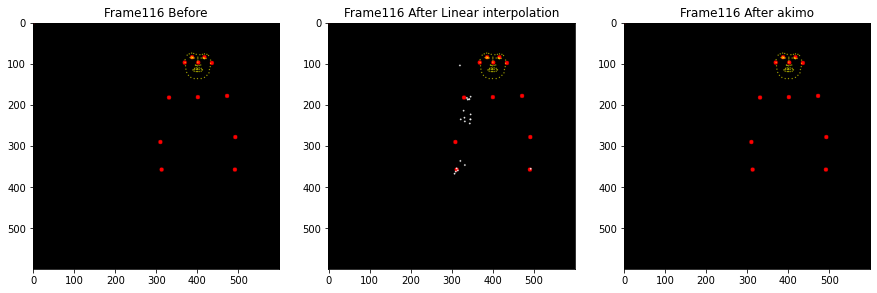

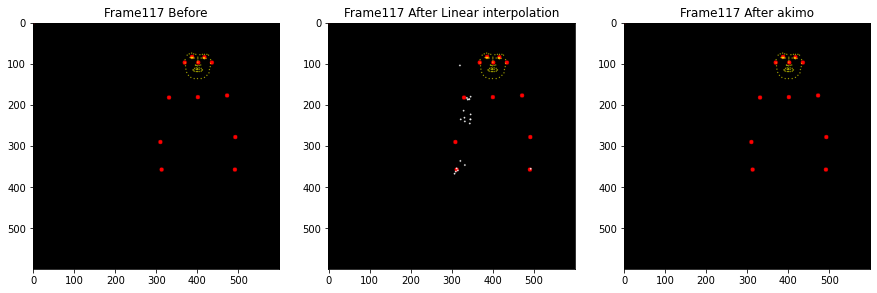

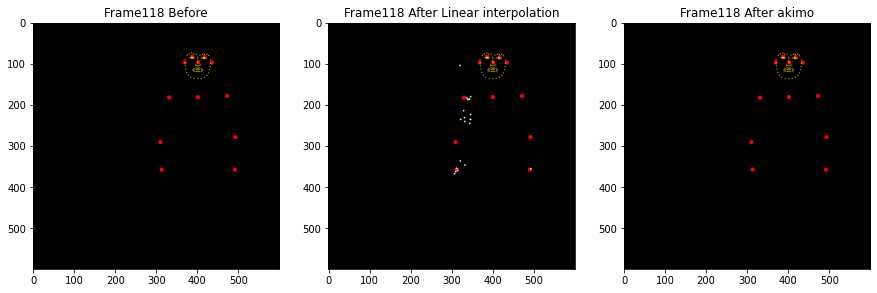

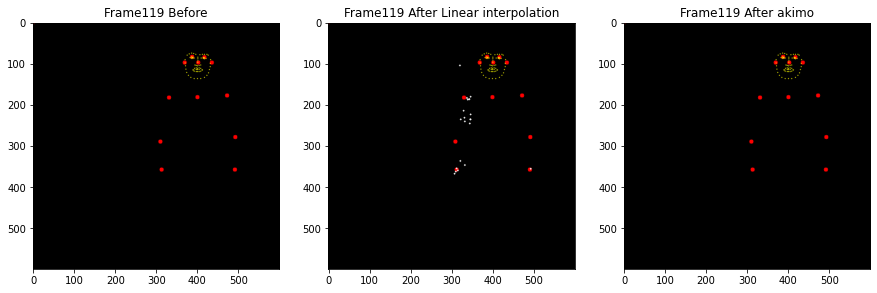

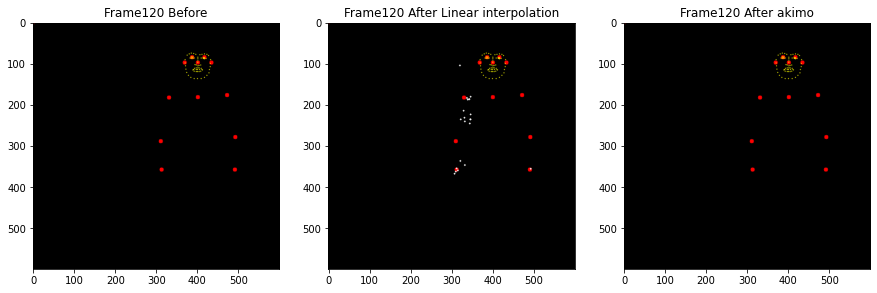

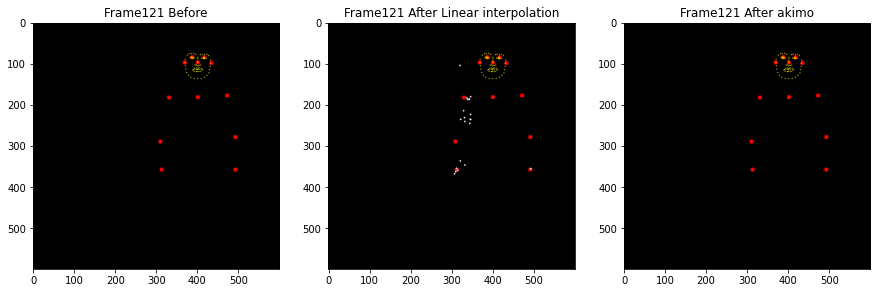

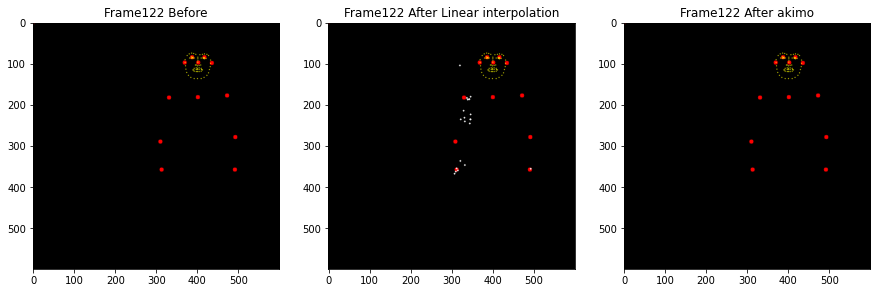

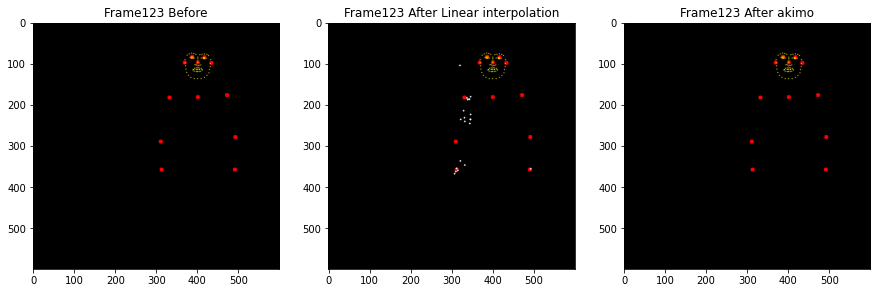

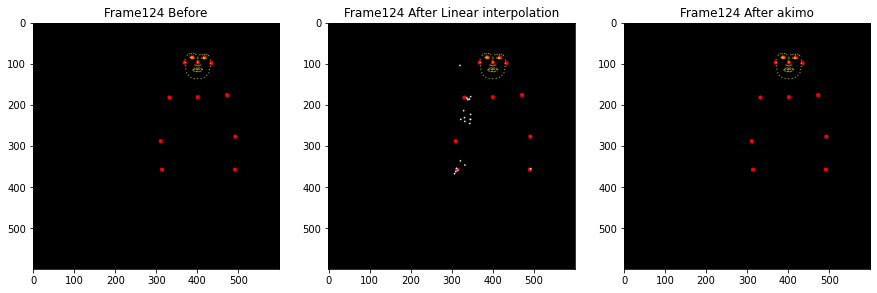

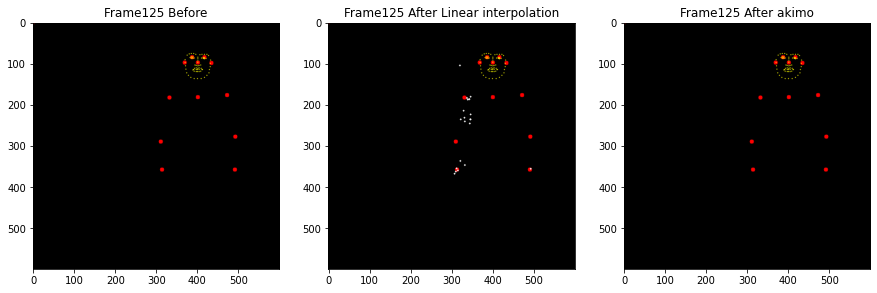

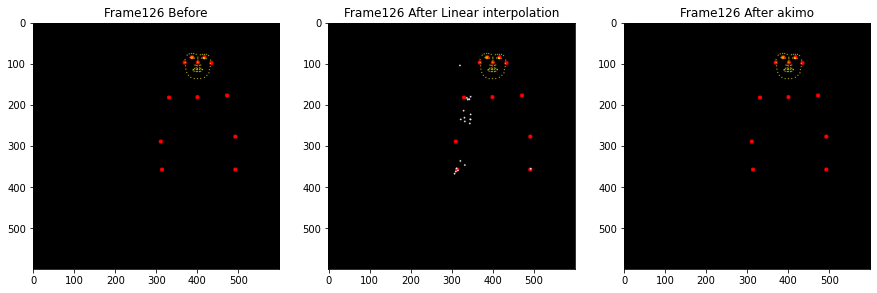

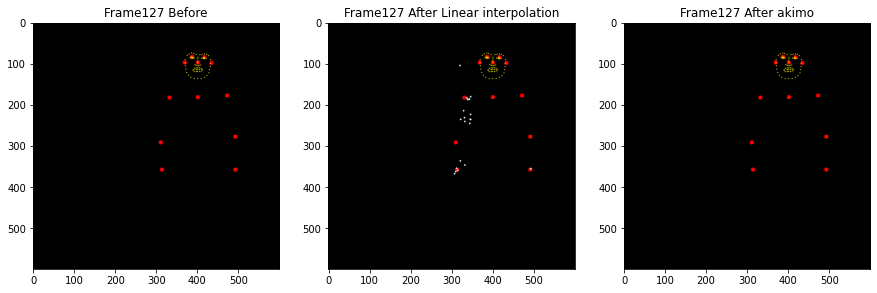

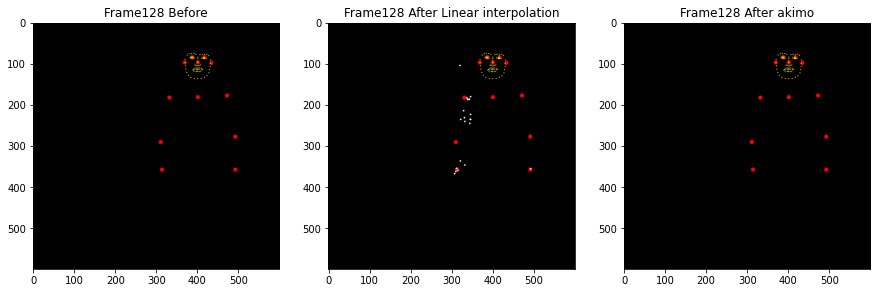

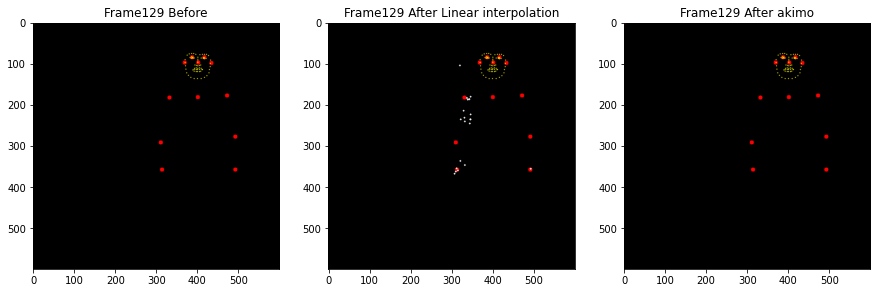

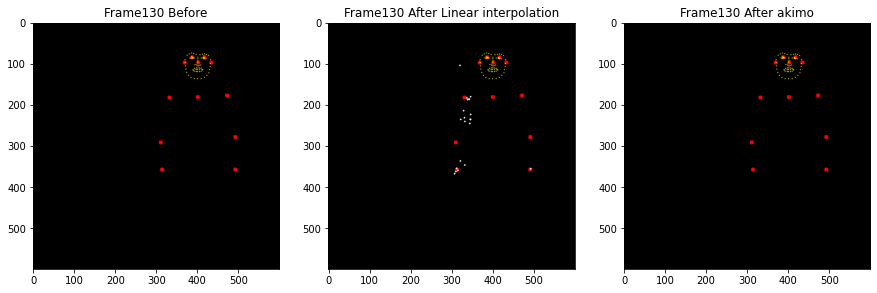

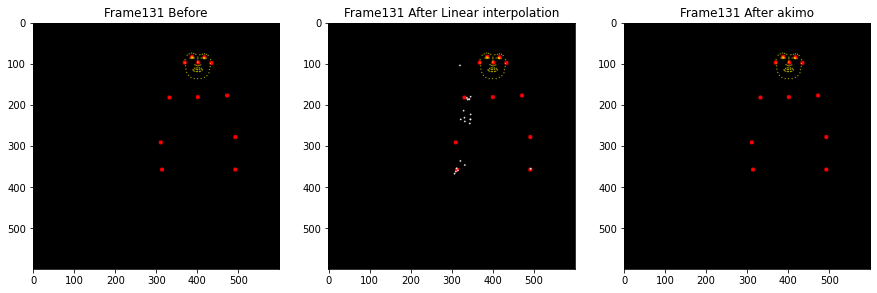

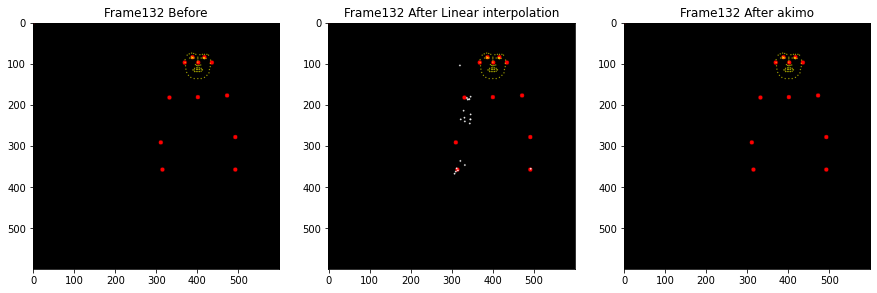

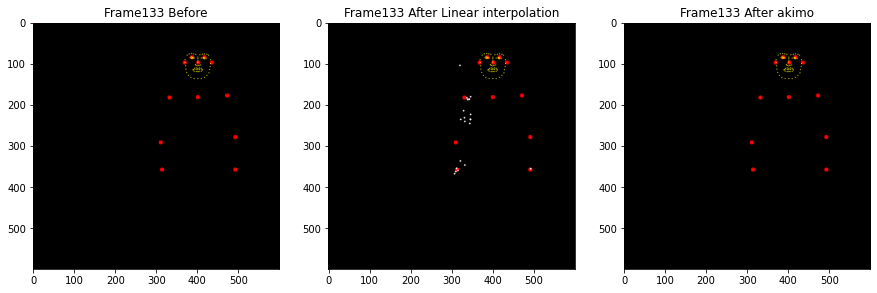

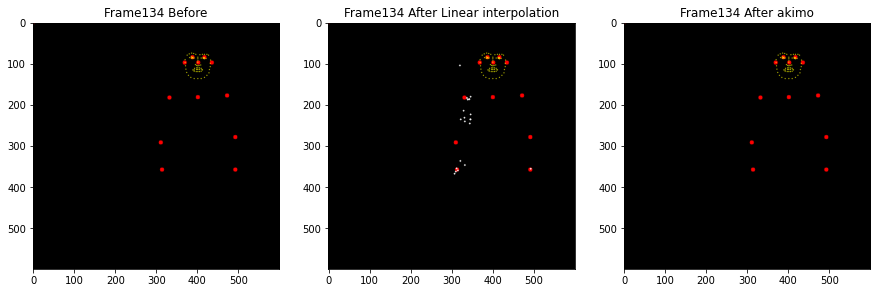

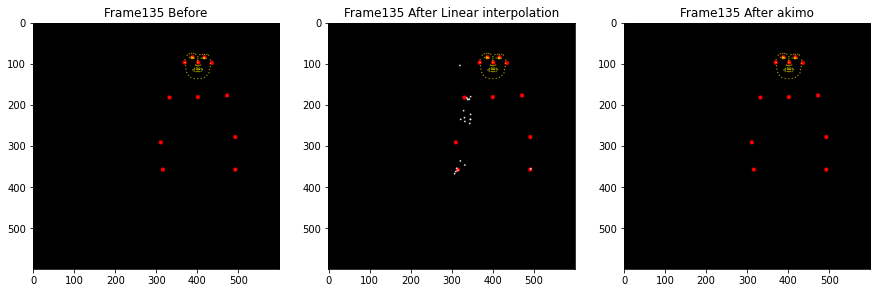

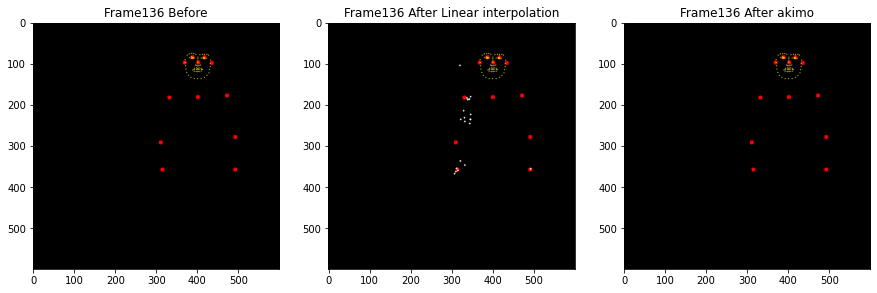

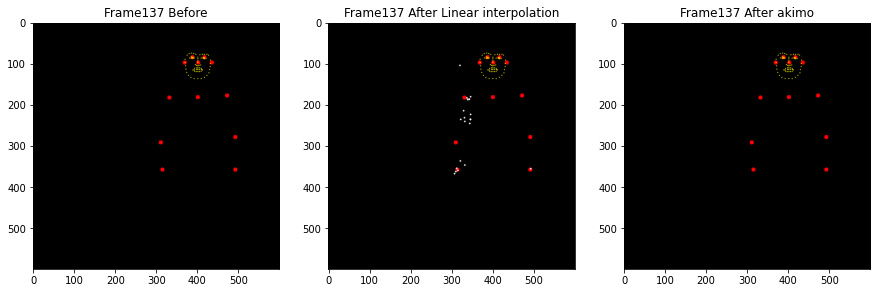

In [ ]:
import numpy as np
import cv2
from math import ceil

for j in range(df_joints.shape[0]):
  img = np.zeros((600,600,3), np.uint8)
  img1=np.zeros((600,600,3), np.uint8)
  img2=np.zeros((600,600,3), np.uint8)
  for i in range(0,df_joints.shape[1],2):
    # print(df_joints.iloc[0,i],df_joints.iloc[0,i+1])


    if (pd.isnull(df_joints.iloc[j,i])):
      x=0
    else:
      x=int(df_joints.iloc[j,i])
    if (pd.isnull(df_joints.iloc[j,(i+1)])):
      y=0
    else:
      y=int(df_joints.iloc[j,i+1])
    

    if (pd.isnull(df_joints_intlin.iloc[j,i])):
      x1=0
    else:
      x1=int(df_joints_intlin.iloc[j,i])
    if (pd.isnull(df_joints_intlin.iloc[j,(i+1)])):
      y1=0
    else:
      y1=int(df_joints_intlin.iloc[j,i+1])

    if (i<232):
      if (pd.isnull(b.iloc[j,i])):
        x2=0
      else:
        x2=int(b.iloc[j,i])
      if (pd.isnull(b.iloc[j,(i+1)])):
        y2=0
      else:
        y2=int(b.iloc[j,i+1])


    if (i<50):
      img = cv2.circle(img, (x,y), radius=5, color=(0, 0, 255), thickness=-1)
      img1 = cv2.circle(img1, (x1,y1), radius=5, color=(0, 0, 255), thickness=-1)
      img2 = cv2.circle(img2, (x2,y2), radius=5, color=(0, 0, 255), thickness=-1)
    elif (i>=50 and i<190):
      img = cv2.circle(img, (x,y), radius=1, color=(0, 255, 255), thickness=-1)
      img1 = cv2.circle(img1, (x1,y1), radius=1, color=(0, 255, 255), thickness=-1)
      img2 = cv2.circle(img2, (x2,y2), radius=1, color=(0, 255, 255), thickness=-1)
    elif (i>=190 and i<232):
      img = cv2.circle(img, (x,y), radius=2, color=(255, 255, 255), thickness=-1)
      img1 = cv2.circle(img1, (x1,y1), radius=2, color=(255, 255, 255), thickness=-1)
      img2 = cv2.circle(img2, (x2,y2), radius=2, color=(255, 255, 255), thickness=-1)
    else:
      img=cv2.circle(img, (x,y), radius=2, color=(255, 255, 255), thickness=-1)
      img1=cv2.circle(img1, (x1,y1), radius=2, color=(255, 255, 255), thickness=-1)
      # img2 = cv2.circle(img2, (x2,y2), radius=2, color=(255, 255, 255), thickness=-1)

  # plt.figure(figsize=(15, 10))
  fig = plt.figure(figsize=(15, 15))
  a = fig.add_subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  a.set_title("Frame"+str(j)+' Before')
  a = fig.add_subplot(1, 3, 2)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  a.set_title("Frame"+str(j)+' After Linear interpolation')
  # print("Frame"+str(j))
      # plt.imshow(image)
  a = fig.add_subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  a.set_title("Frame"+str(j)+' After akimo')
  plt.show()
# imgplot = plt.imshow(img)

In [ ]:
import cv2 

cap= cv2.VideoCapture("/content/drive/MyDrive/ISL Openpose/Videos/tea.mp4")
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite("/content/drive/MyDrive/ISL Openpose/Output/Tea/frames/frame"+str(i)+".jpg",frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

#       cv2.imwrite("/content/drive/MyDrive/ISL Openpose/Output/Tea/frames/frame"+str(count)+".jpg" , frame)   
#       count += 1
      
# FrameCapture("/content/drive/MyDrive/ISL Openpose/Videos/tea.mp4") 

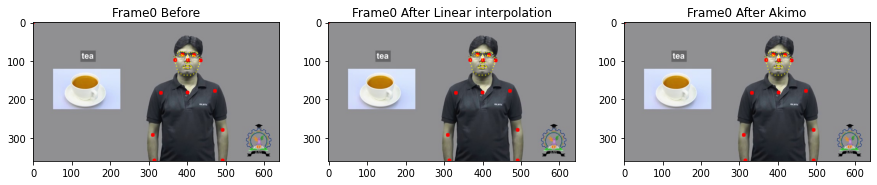

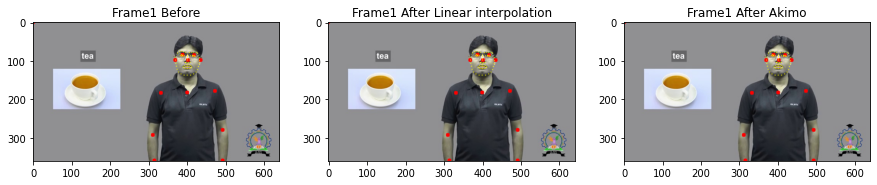

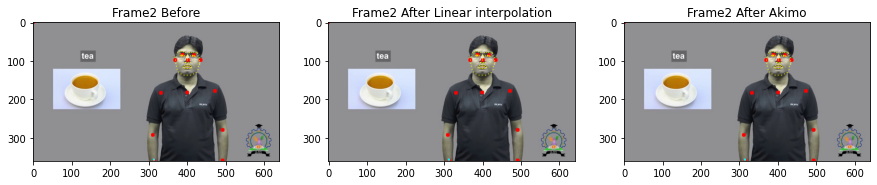

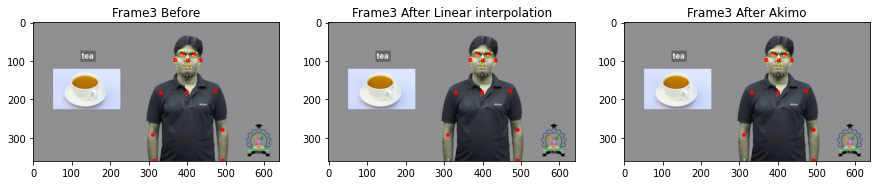

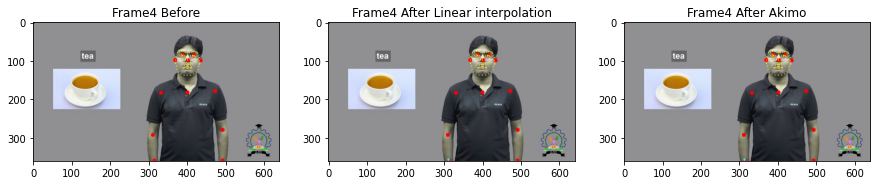

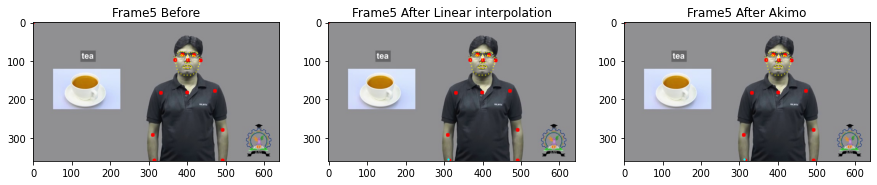

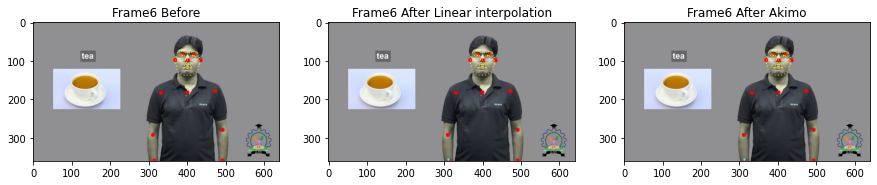

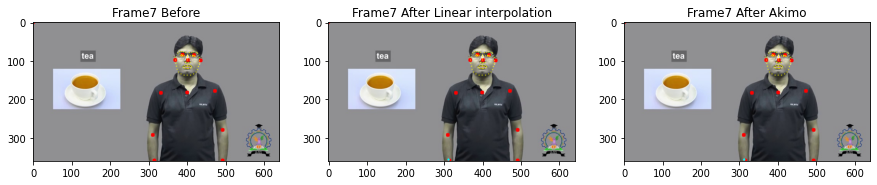

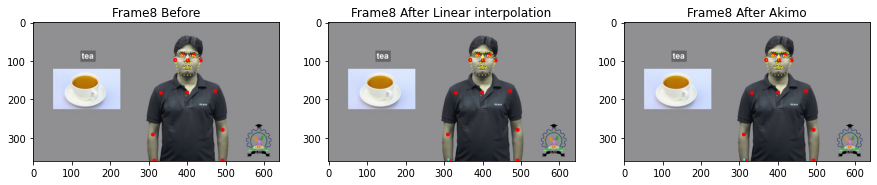

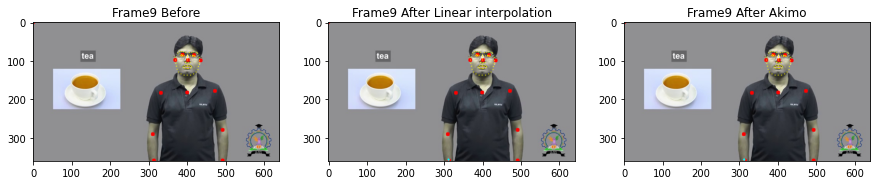

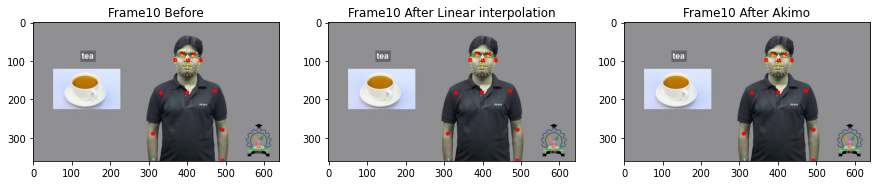

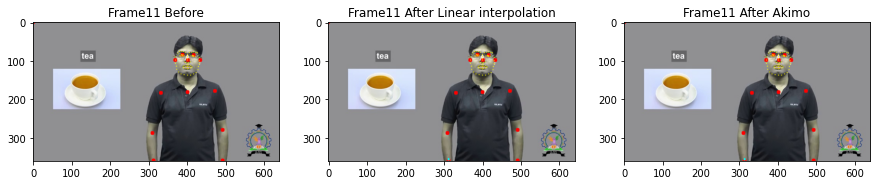

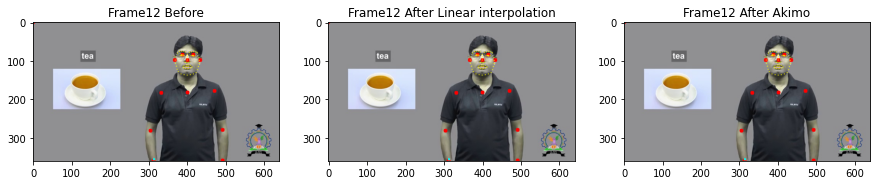

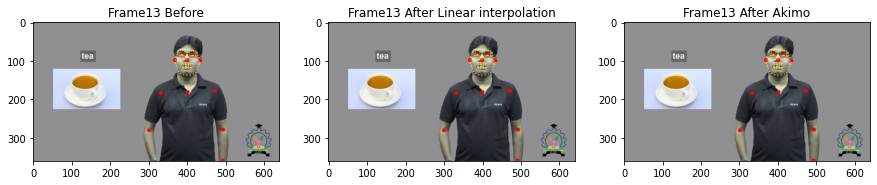

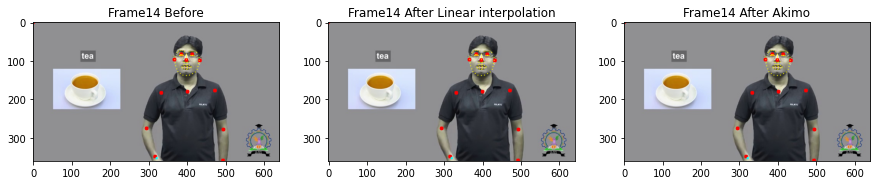

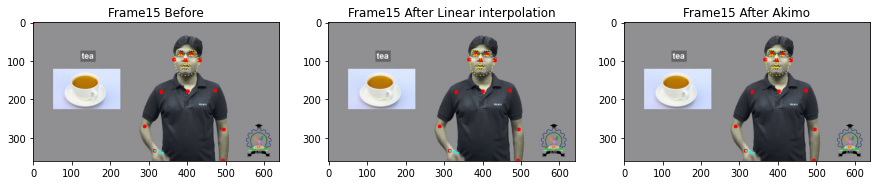

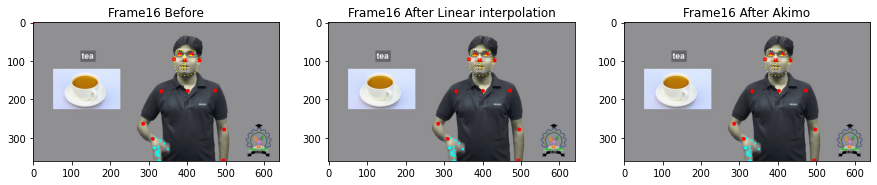

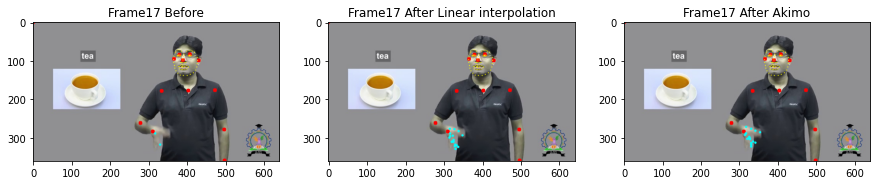

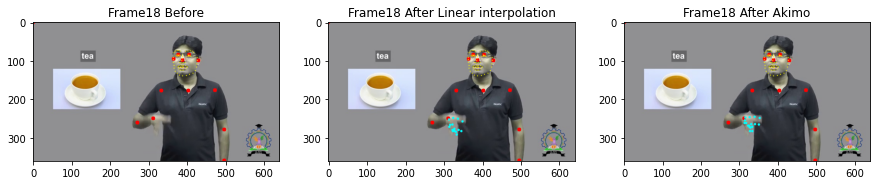

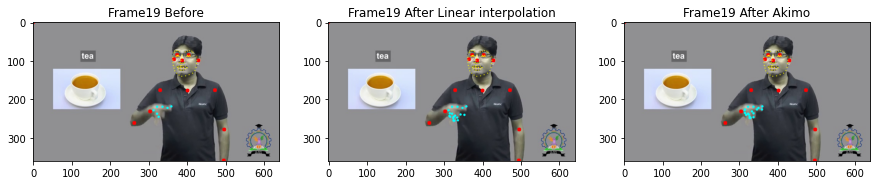

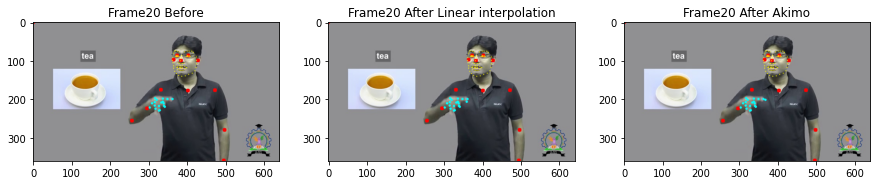

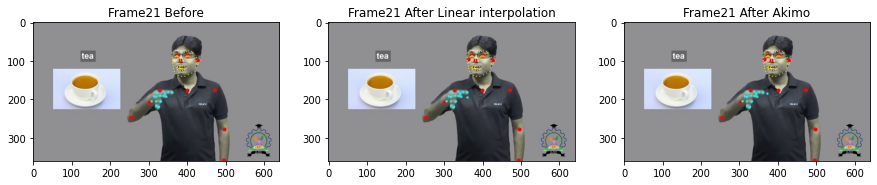

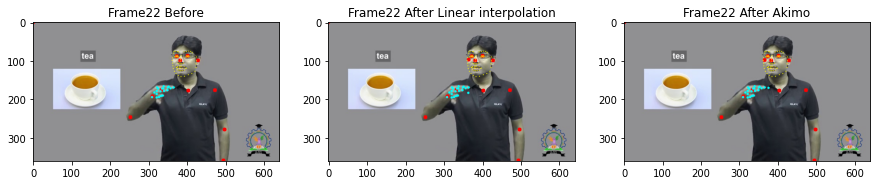

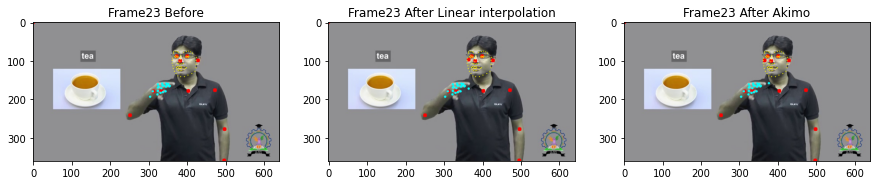

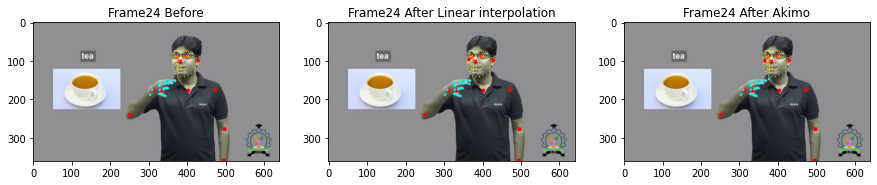

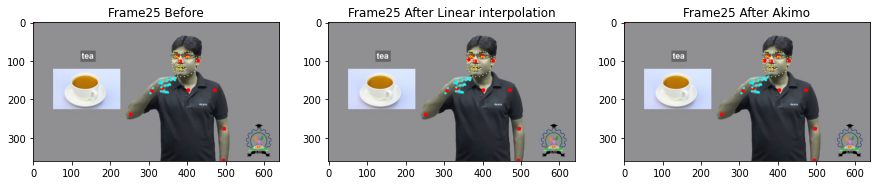

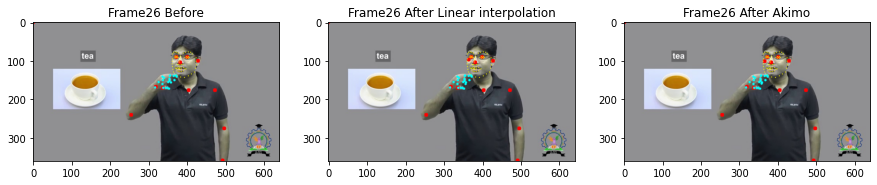

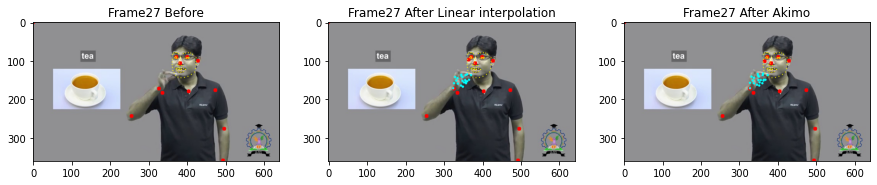

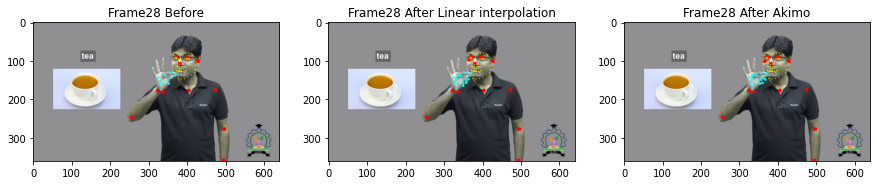

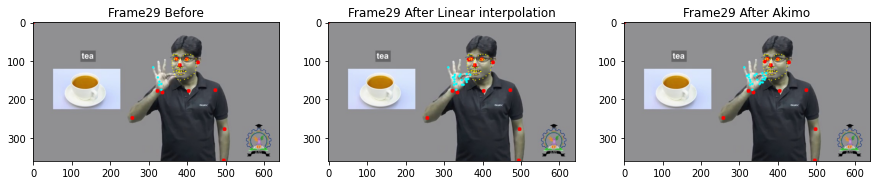

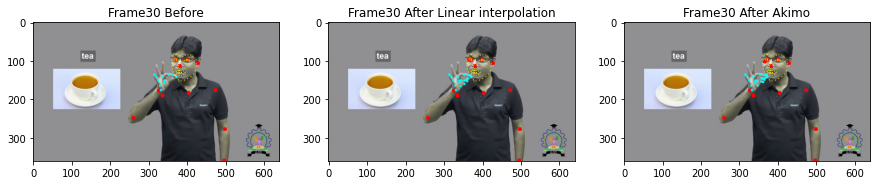

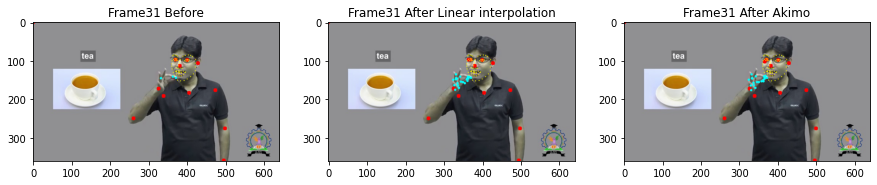

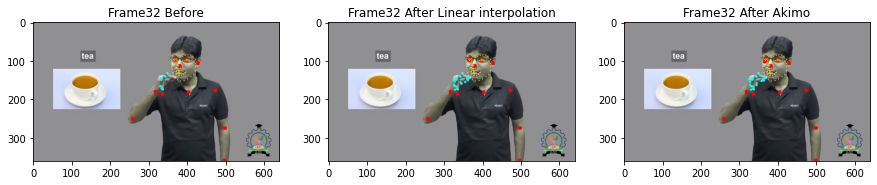

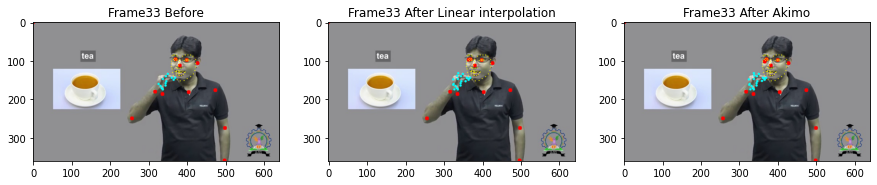

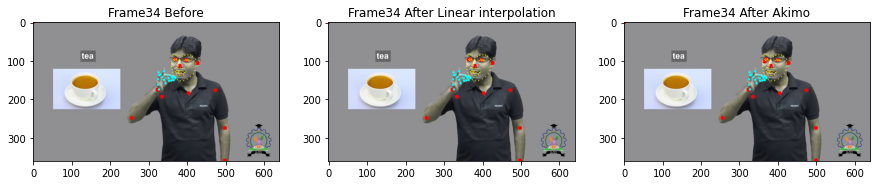

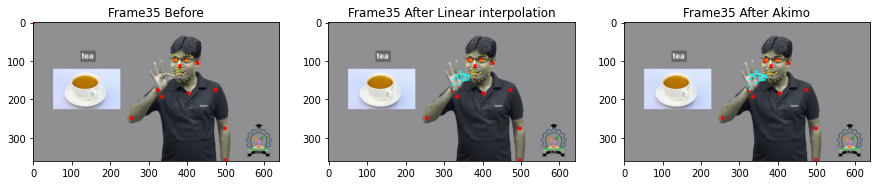

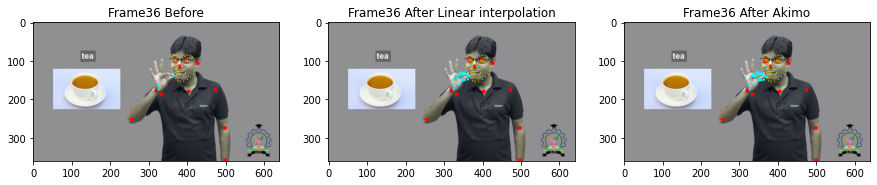

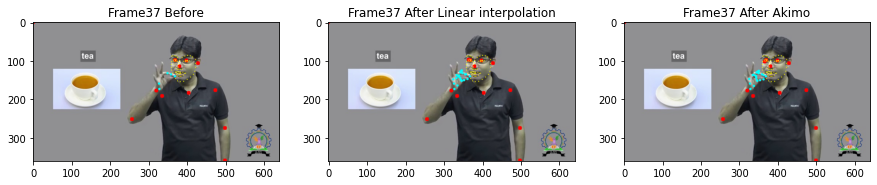

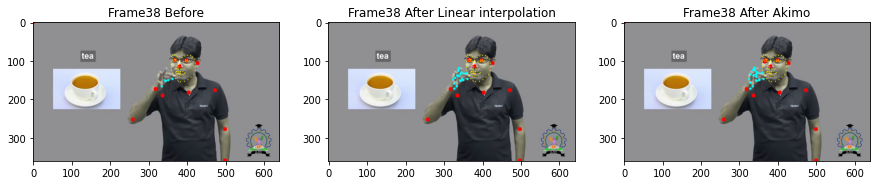

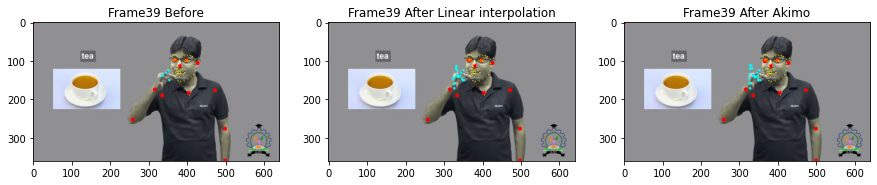

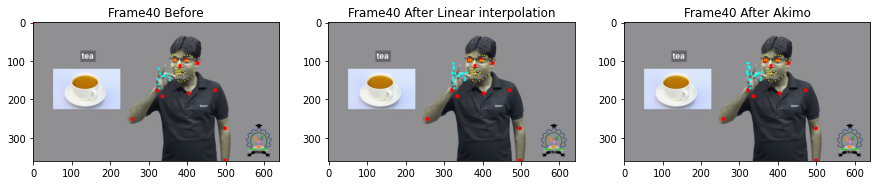

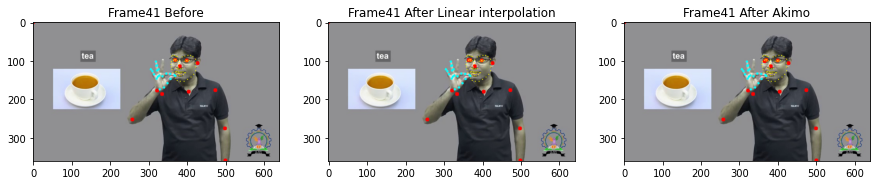

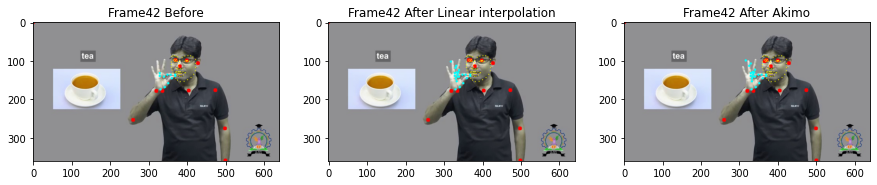

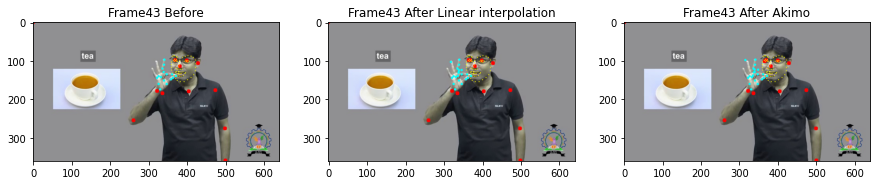

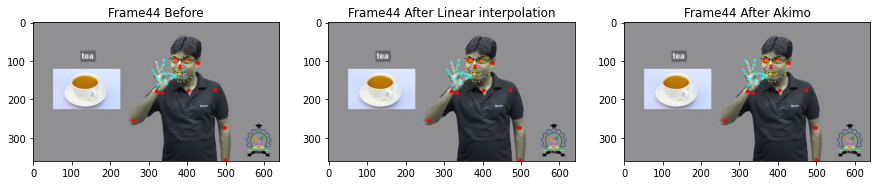

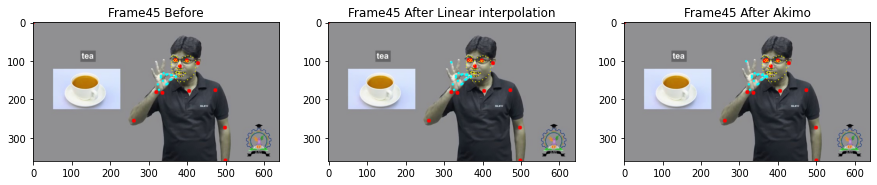

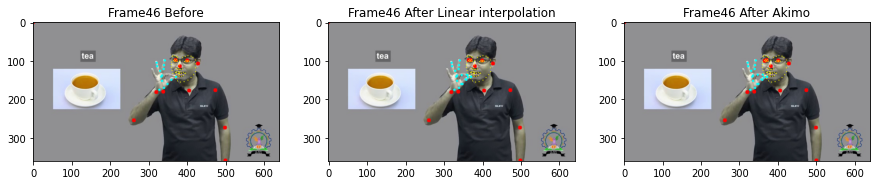

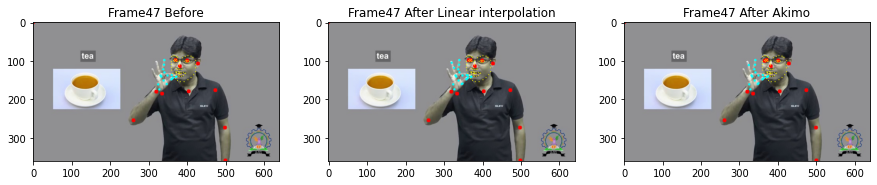

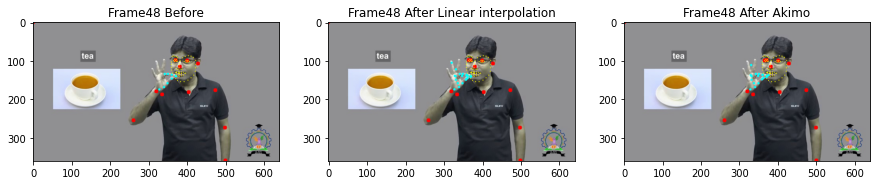

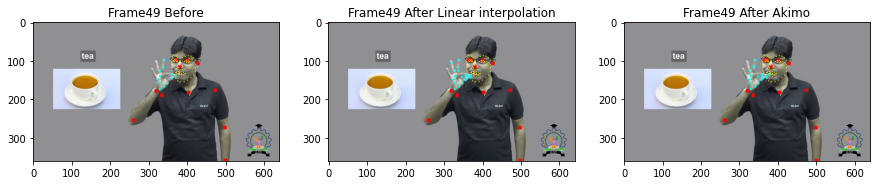

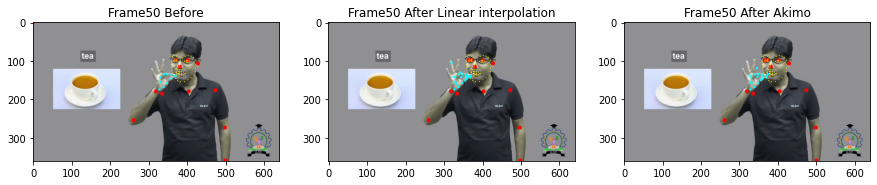

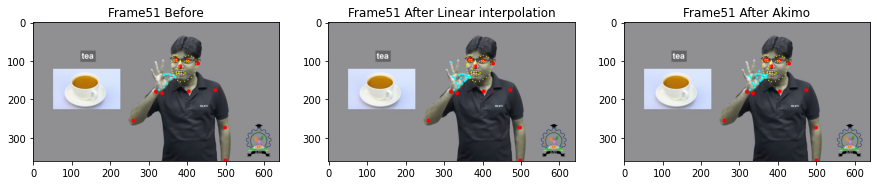

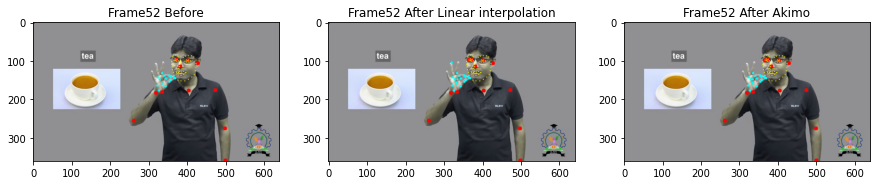

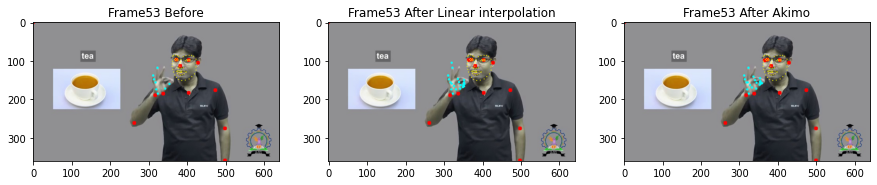

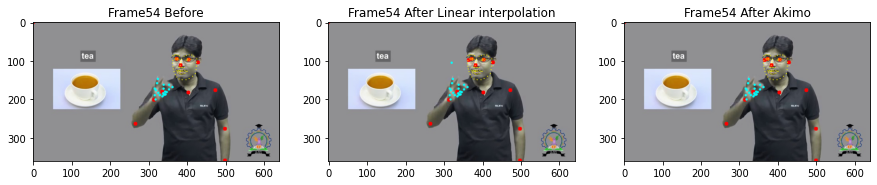

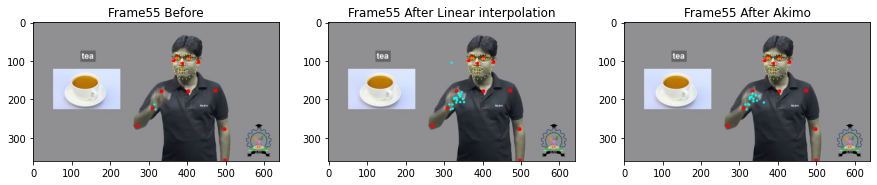

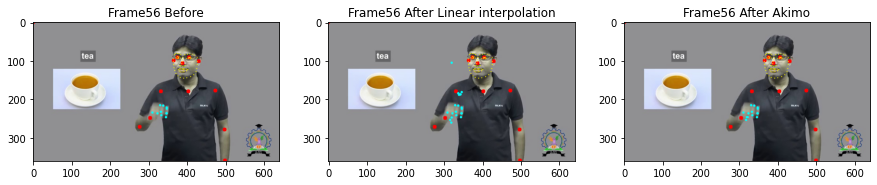

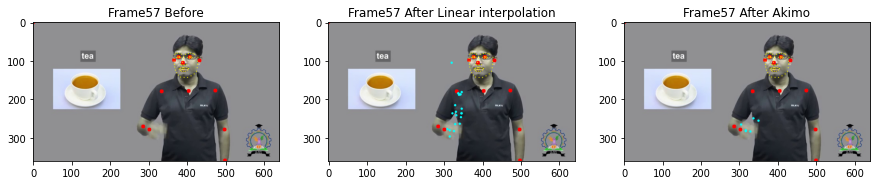

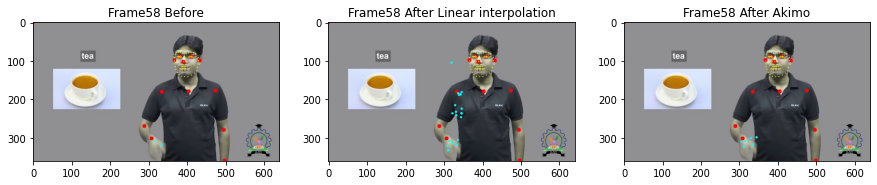

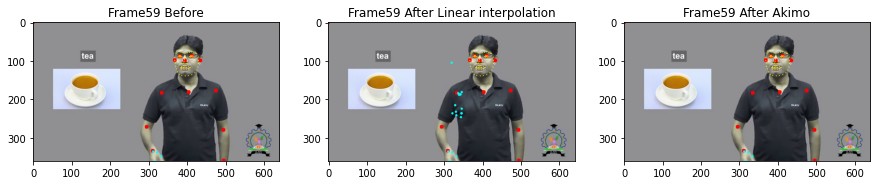

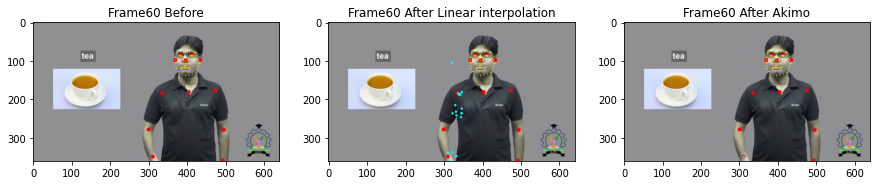

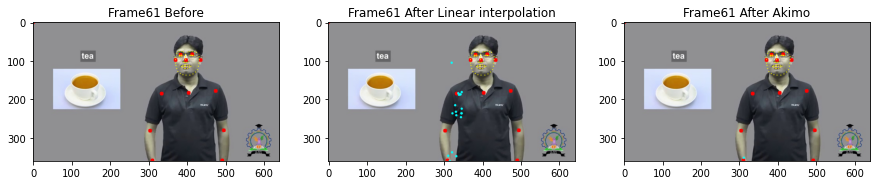

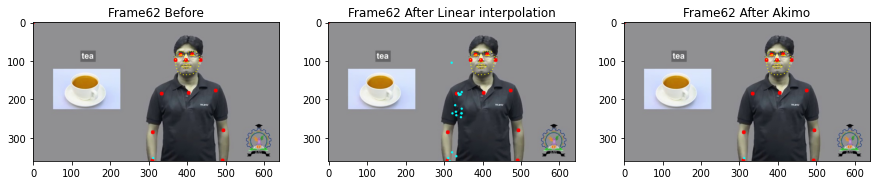

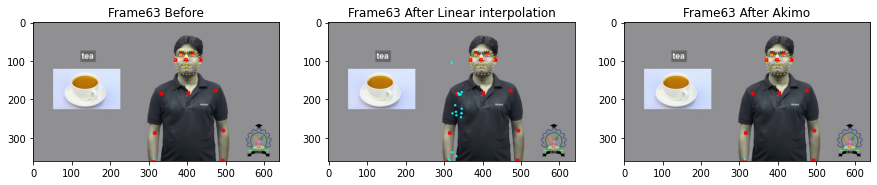

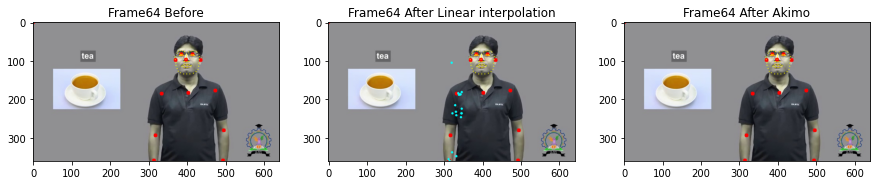

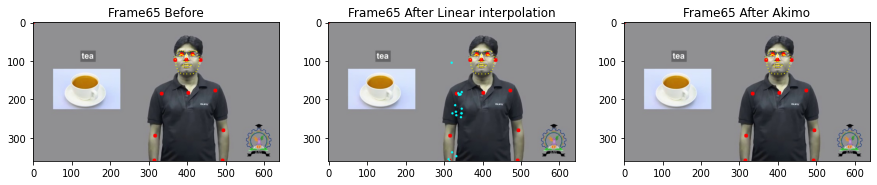

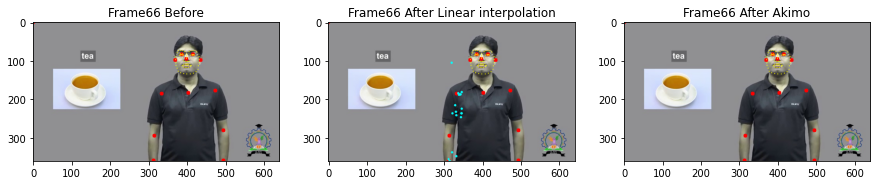

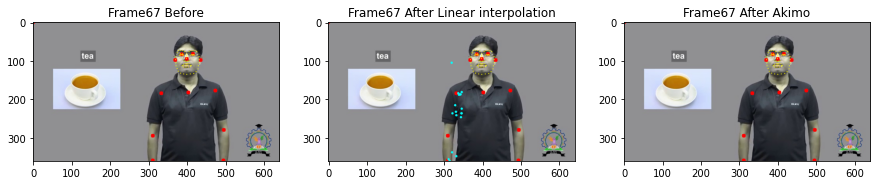

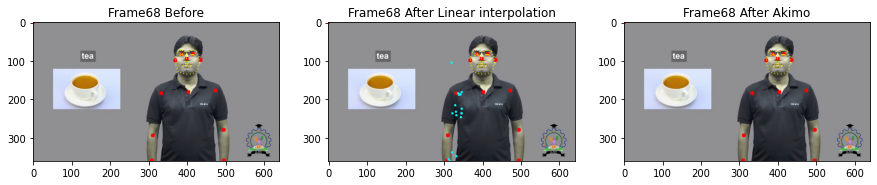

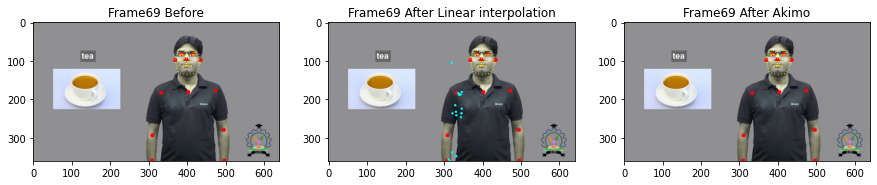

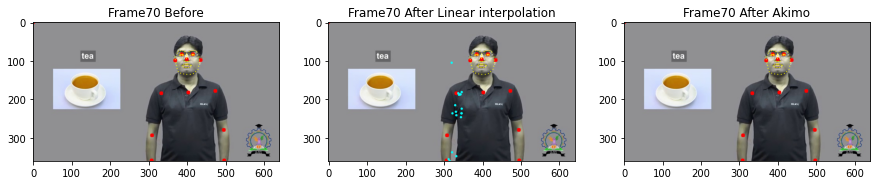

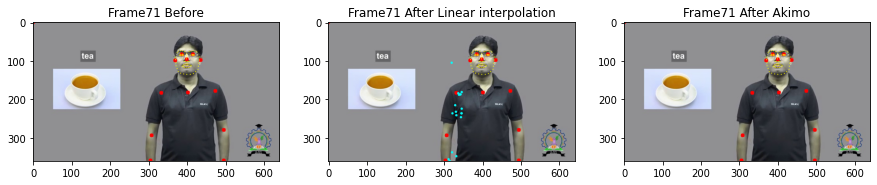

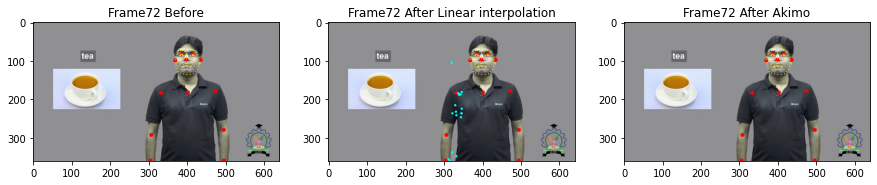

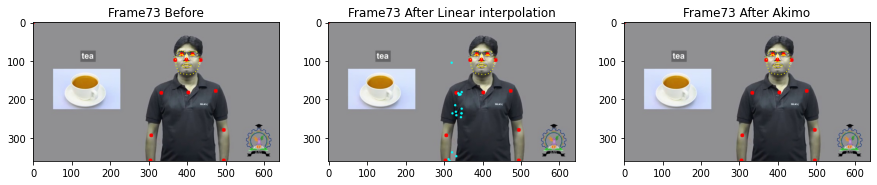

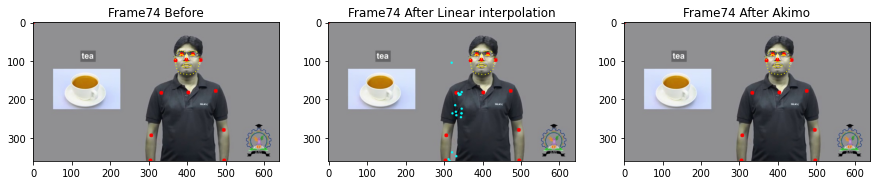

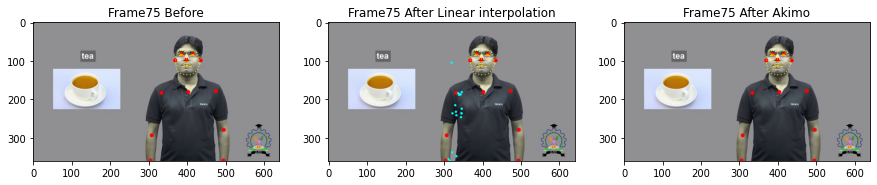

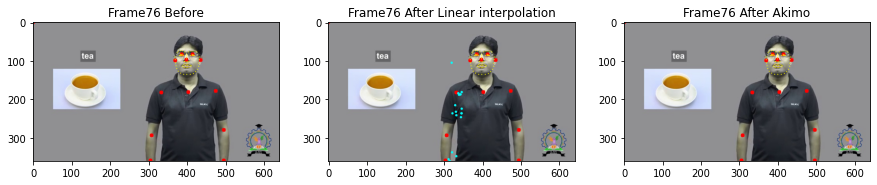

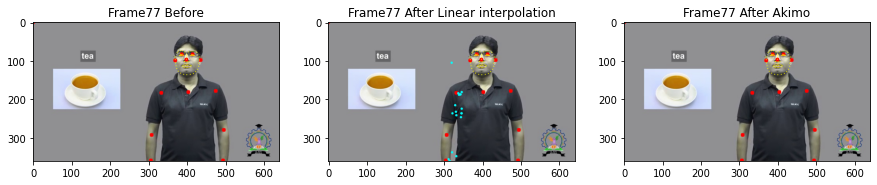

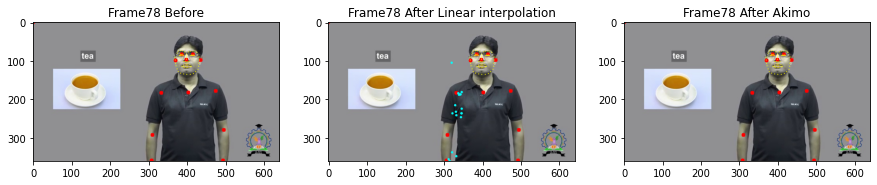

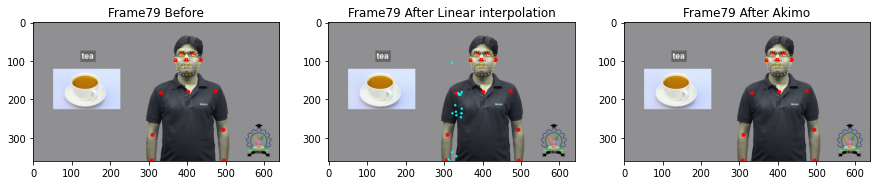

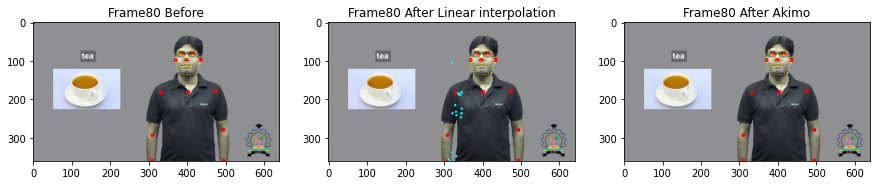

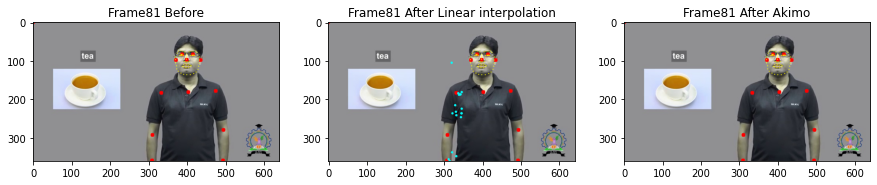

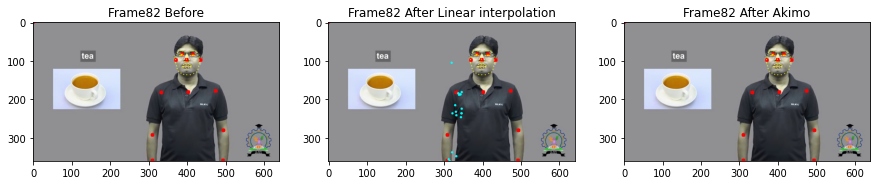

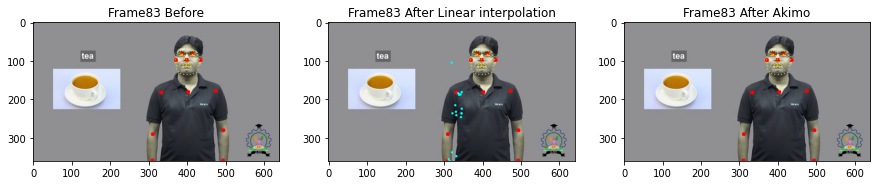

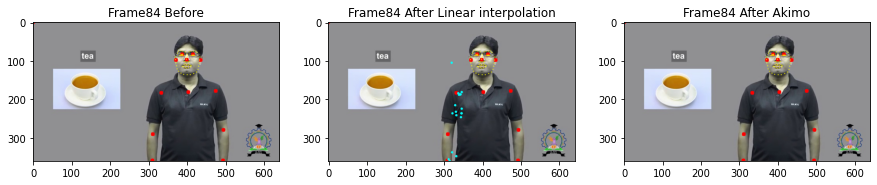

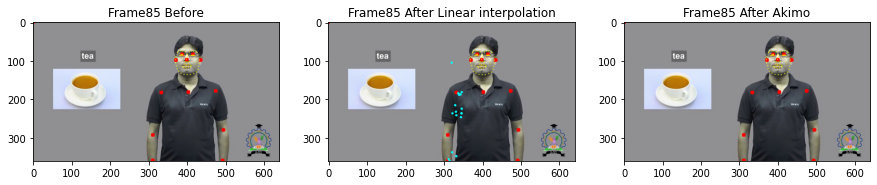

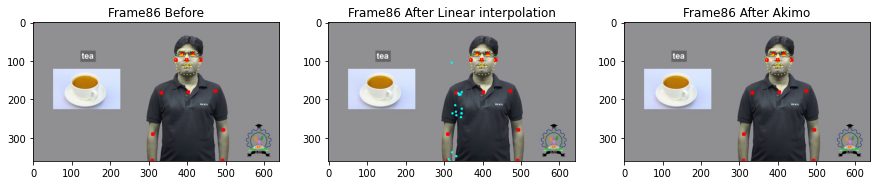

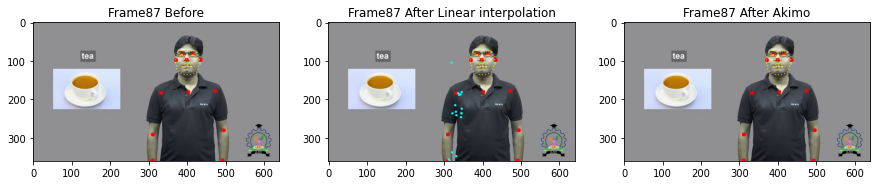

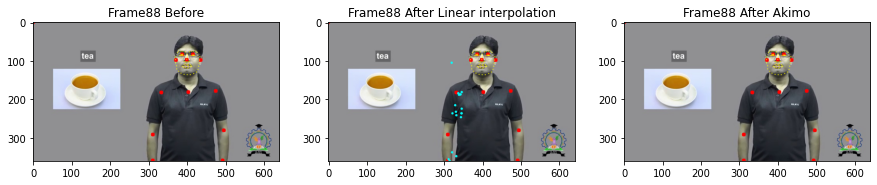

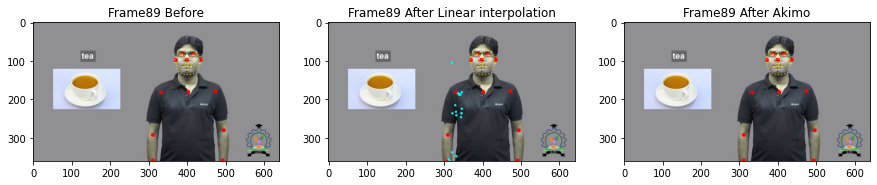

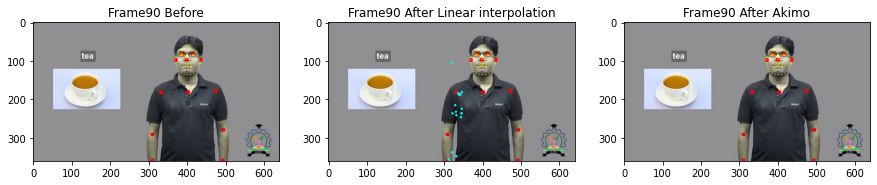

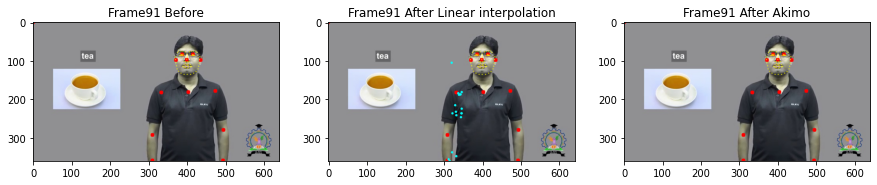

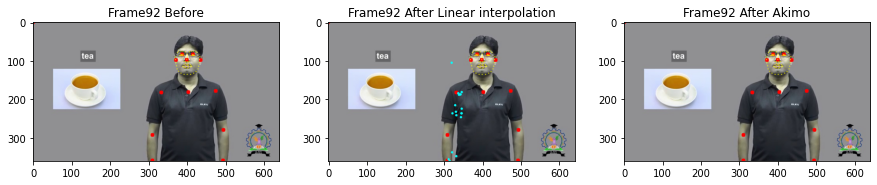

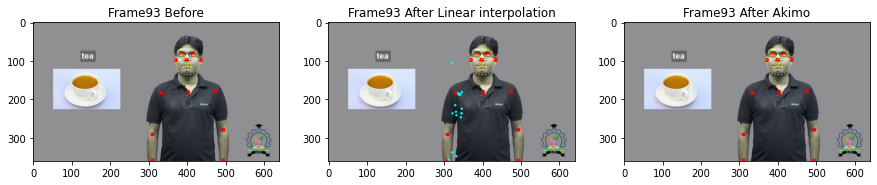

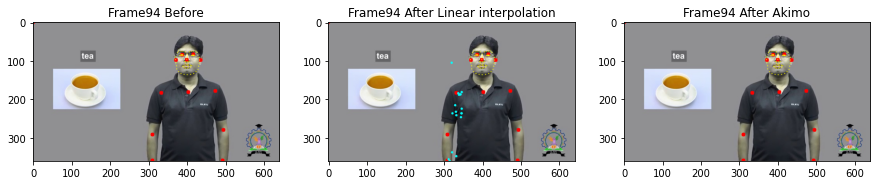

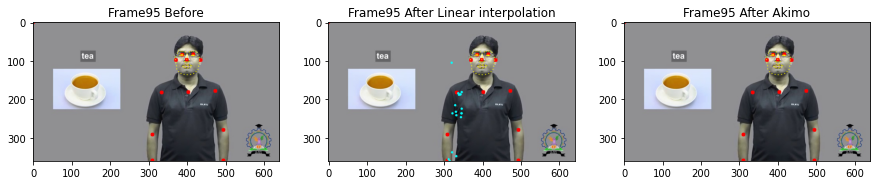

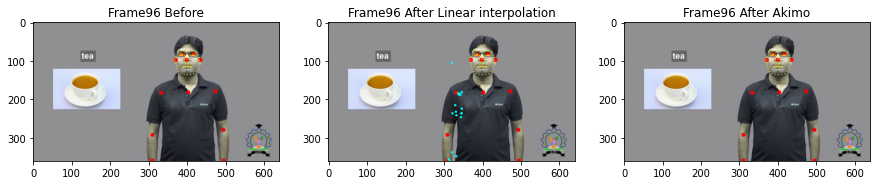

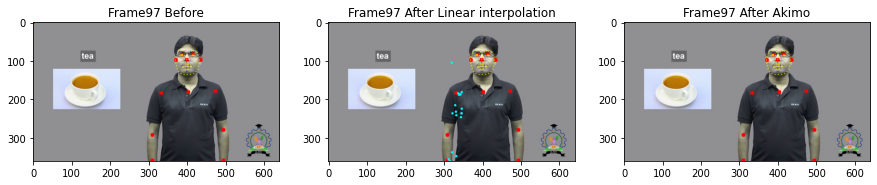

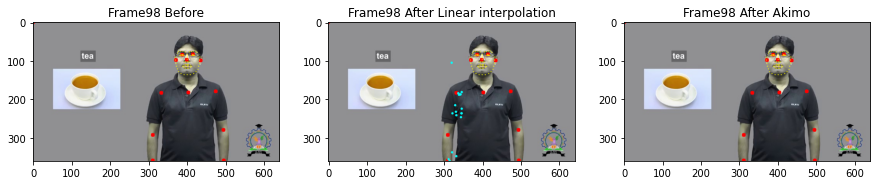

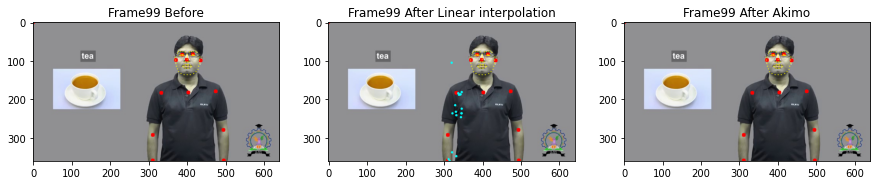

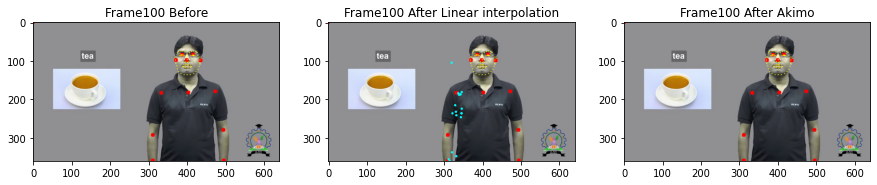

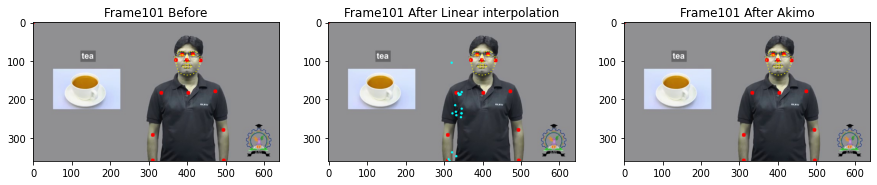

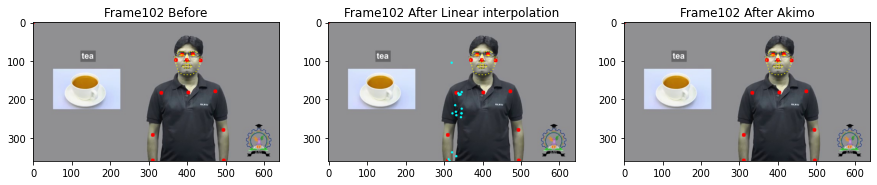

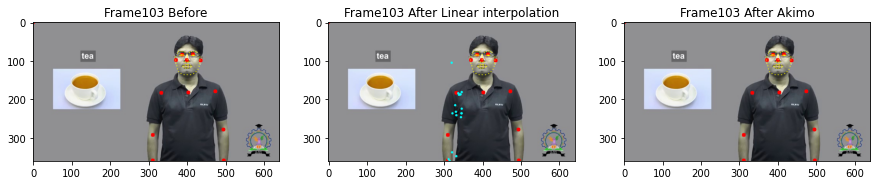

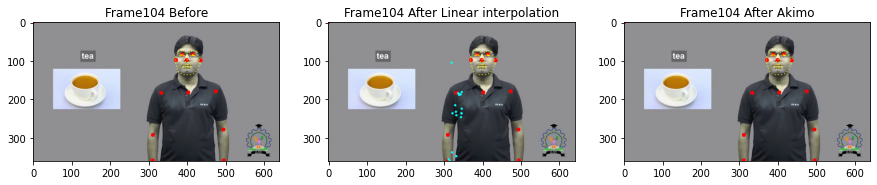

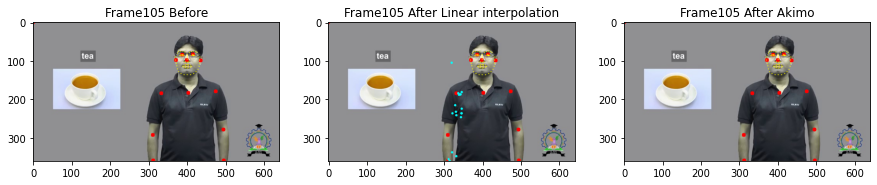

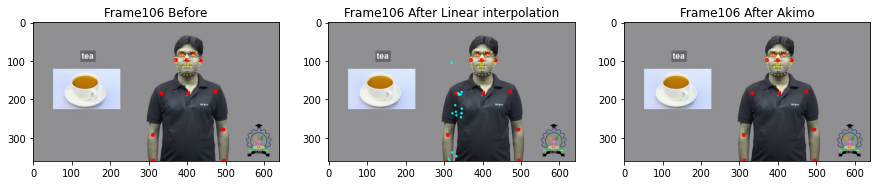

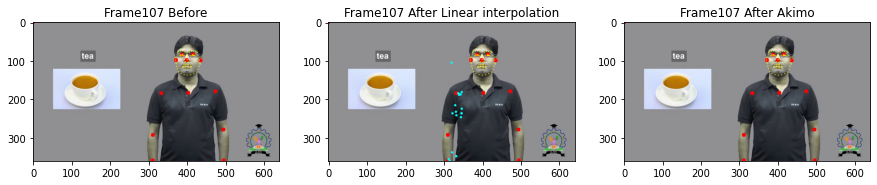

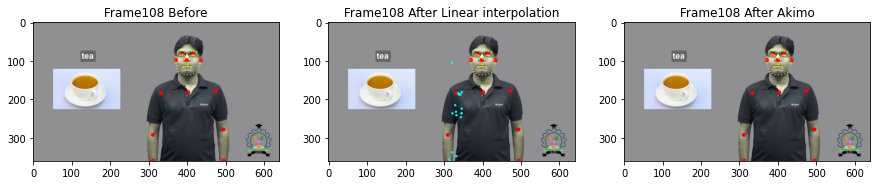

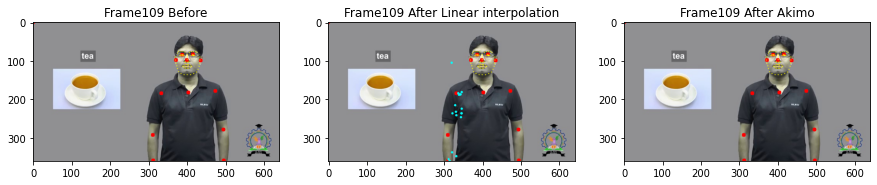

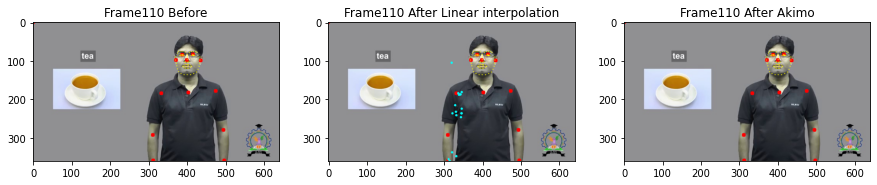

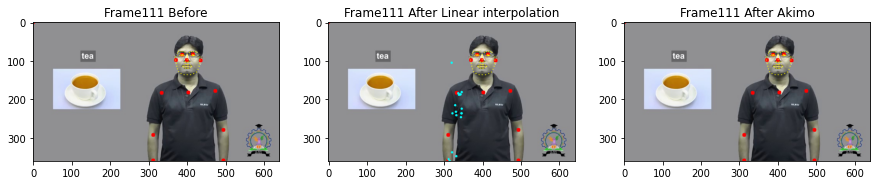

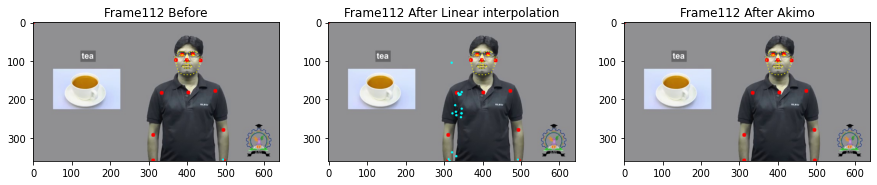

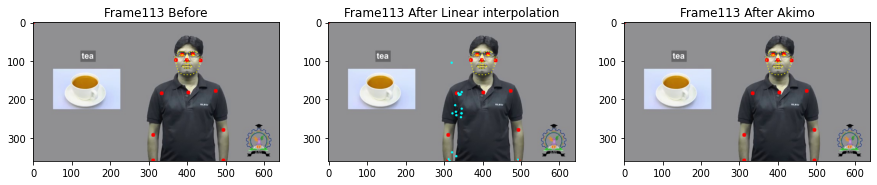

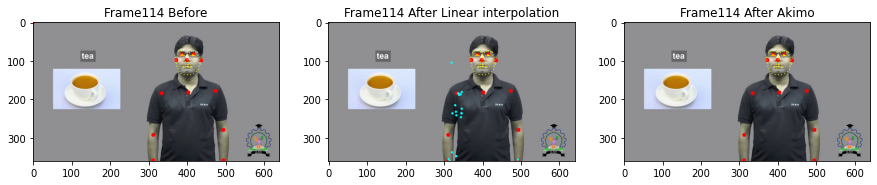

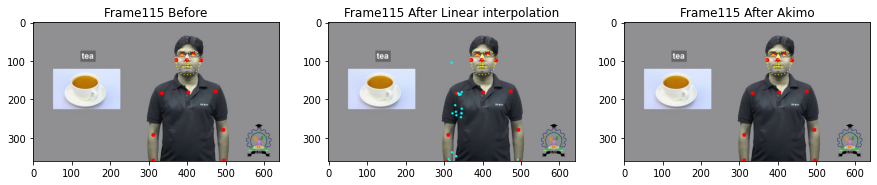

error: ignored

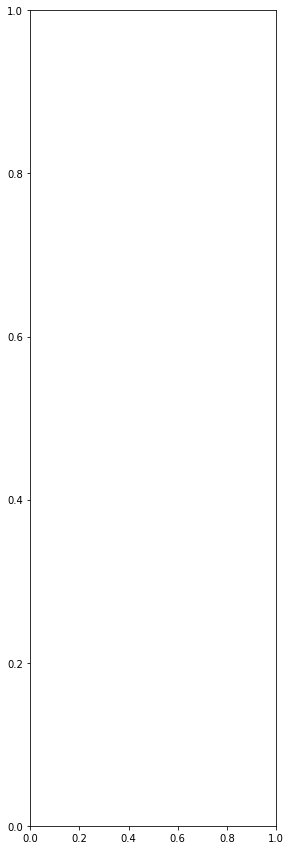

In [ ]:
import numpy as np
import cv2
from math import ceil

for j in range(df_joints.shape[0]):
  img = cv2.imread('/content/drive/MyDrive/ISL Openpose/Output/Tea/frames/frame'+str(j+22)+'.jpg')
  img1=cv2.imread('/content/drive/MyDrive/ISL Openpose/Output/Tea/frames/frame'+str(j+22)+'.jpg')
  img2=cv2.imread('/content/drive/MyDrive/ISL Openpose/Output/Tea/frames/frame'+str(j+22)+'.jpg')
  for i in range(0,df_joints.shape[1],2):
    # print(df_joints.iloc[0,i],df_joints.iloc[0,i+1])


    if (pd.isnull(df_joints.iloc[j,i])):
      x=0
    else:
      x=int(df_joints.iloc[j,i])
    if (pd.isnull(df_joints.iloc[j,(i+1)])):
      y=0
    else:
      y=int(df_joints.iloc[j,i+1])
    

    if (pd.isnull(df_joints_intlin.iloc[j,i])):
      x1=0
    else:
      x1=int(df_joints_intlin.iloc[j,i])
    if (pd.isnull(df_joints_intlin.iloc[j,(i+1)])):
      y1=0
    else:
      y1=int(df_joints_intlin.iloc[j,i+1])

    if (i<232):
      if (pd.isnull(b.iloc[j,i])):
        x2=0
      else:
        x2=int(b.iloc[j,i])
      if (pd.isnull(b.iloc[j,(i+1)])):
        y2=0
      else:
        y2=int(b.iloc[j,i+1])


    if (i<50):
      img = cv2.circle(img, (x,y), radius=5, color=(0, 0, 255), thickness=-1)
      img1 = cv2.circle(img1, (x1,y1), radius=5, color=(0, 0, 255), thickness=-1)
      img2 = cv2.circle(img2, (x2,y2), radius=5, color=(0, 0, 255), thickness=-1)
    elif (i>=50 and i<190):
      img = cv2.circle(img, (x,y), radius=1, color=(0, 255, 255), thickness=-1)
      img1 = cv2.circle(img1, (x1,y1), radius=1, color=(0, 255, 255), thickness=-1)
      img2 = cv2.circle(img2, (x2,y2), radius=1, color=(0, 255, 255), thickness=-1)
    elif (i>=190 and i<232):
      img = cv2.circle(img, (x,y), radius=3, color=(255, 255, 0), thickness=-1)
      img1 = cv2.circle(img1, (x1,y1), radius=3, color=(255, 255, 0), thickness=-1)
      img2 = cv2.circle(img2, (x2,y2), radius=3, color=(255, 255, 0), thickness=-1)
    else:
      img=cv2.circle(img, (x,y), radius=3, color=(255, 255, 0), thickness=-1)
      img1=cv2.circle(img1, (x1,y1), radius=3, color=(255, 255, 0), thickness=-1)
      # img2 = cv2.circle(img2, (x2,y2), radius=2, color=(255, 255, 255), thickness=-1)

  # plt.figure(figsize=(15, 10))
  fig = plt.figure(figsize=(15, 15))
  a = fig.add_subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  a.set_title("Frame"+str(j)+' Before')
  a = fig.add_subplot(1, 3, 2)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  a.set_title("Frame"+str(j)+' After Linear interpolation')
  # print("Frame"+str(j))
      # plt.imshow(image)
  a = fig.add_subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  a.set_title("Frame"+str(j)+' After Akimo')
  plt.show()
# imgplot = plt.imshow(img)

138